## Contents:
**1.Introduction**

**2.Libraries**

**3.EDA**

**4.Feature Engineering**

**5.Feature Selection**

**6.Conclusion**

## Introduction:


In this Global Life Expectancy data, where different countries are listed according to their development status, and showing what fatcors are there to affect life expectancy of that country from 2000 to 2015, and to find if those factors really affecting life expectency positively or negatively in the growth of life expectancy. 
First, I have to look into data to find if the data is all clean to process further analyses or not?
Then I will use the technique to fill the missing values, and find  feature that is affecting life expectancy.


## Libraries used:

In [431]:
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
import scipy.stats as stats #for ttest
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization
from sqlalchemy import create_engine # for open connection of SQL and python
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Accessing Thinkful Database:

In [432]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expectancy = pd.read_sql_query('select * from lifeexpectancy',con=engine) #pandas query string

engine.dispose() #close the connection

### Making copy of original data:
We don't want to made any permanent changes on original data, and any changes made on copy of dataframe will not reflect on original data.

In [433]:
#copy of orinal data
life_expectancy_c=life_expectancy.copy()

In [434]:
life_expectancy_c

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Observation: After quick checking the data, we do see few missing values, but need more exploration.

## EDA: 
**Exploratory Data Analysis**

- Description
- Data Cleaning
- Data Exploration


In [435]:
#Lets, see some information of data
life_expectancy_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

Observation:
- There is 2938 rows and 22 columns. 
- Dtypes looks okay as Country and Status is object, and others are floats and integers. 
- Life expectancy, Adult Mortality, Alcohol, Hepatitis, BMT, Polio, Total expenditure, Diptheria, GDP, Population, thinness 1-19 and thinness 5-9, Income composition, and schooling are missing some values.

### Description:

In [436]:
##to generate descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
life_expectancy_c.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Observation:
From description of data, We can see that:

- Adult Mortality, infant deaths, percentage expenditure, Measles, under-five deaths, GDP, have really high standard deviation and max is way high. 

- GDP and percentage expenditure might make some sense because there is some developed countries which got really high number in GDP and Percentage of expenditure. 

- Population data looks so weird, need to be checked. 

- Percentage expenditure has 0 min, which doesn't make any sense and might be missing values and max is 19479 which is outrages, and doesn't make any sense. But I will wait till data exploration to see more.

Checking for all those percentage expenditure higher than 100.

In [437]:
#percenatge expenditure higher than 100
life_expectancy_c[life_expectancy_c['percentage expenditure'] > 100]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2
27,Albania,2004,Developing,73.0,17.0,1,4.54,221.842800,99.0,7,...,98.0,6.38,97.0,0.1,2416.588235,326939.0,1.8,1.9,0.681,10.9
29,Albania,2002,Developing,73.3,15.0,1,3.73,104.516916,96.0,16,...,98.0,6.30,98.0,0.1,1453.642777,3511.0,2.0,2.1,0.670,10.7
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4


### Data Cleaning:

In [438]:
#fixing those 0's in percentage expenditure by replacing it to missing values.
life_expectancy_c['percentage expenditure'].replace(0, np.nan, inplace=True)

Checking columns:

In [439]:
#Checking for column data if needed cleanning
life_expectancy_c.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Observation:
We can see some of the columns have white space in the beggining and end of the string, so I will fix it.

In [440]:
#cleaning all white space in columns name
life_expectancy_c.columns = life_expectancy_c.columns.str.strip() #deleting white space on both side of string

In [441]:
#checking if it looks okay or not after removing white space
life_expectancy_c.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Observation:
We can see all the columns title has no white space, but still we can see thinness 1-19 years does have some space in between, which is okay.

#### Missing values:

Checking missing values in the data:

In [442]:
#Lets, see the sum of missing values in the table for each columns.
life_expectancy_c.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure             611
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Observation:
- We can see lots of missing values, high of 652 in population to low of 10 in Life expectancy and Adult mortality.
- Life expectancy, Adult Mortality, Alcohol, percentage expenditure, Hepatitis B, BMI, Polio, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, and Schooling are missing values.
- As there is only 10 missing values in life expectancy and adult mortality, lets remove all the missing values from those columns.

#### Dropping lowest missing number of values:
As Life expectancy and Adult mortality is only missing 10 values, which is really low number and it might be best to drop this null values, as they don't affect much on these features. Dropping these will save some time and memory.

In [443]:
#dropping lower number of missing values in life expectancy and adult mortality.

life_expectancy_c.dropna(subset=['Life expectancy'], inplace=True)
life_expectancy_c.dropna(subset=['Adult Mortality'], inplace=True)


#### Fillin missing values by grouping country: 
All the values in data is for different countries, and I want to fillin the missing values by grouping all the country first and fillin mean value to null within that country.

In [444]:
#grouping all the features by country
grouped_country = life_expectancy_c.groupby('Country', as_index = False)


In [445]:
#filling all missing values with their mean grouping by country
life_expectancy_c = grouped_country.apply(lambda x: x.fillna(x.mean()))

Checking for any missing values after fillin missing values.

In [446]:
#checking for remaining missing values
life_expectancy_c.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             16
percentage expenditure             416
Hepatitis B                        144
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                400
Population                         640
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

Observation:
- After transforming and filling na, I still can see some missing values, which I think make sense, because there is some countries, which are missing all the number value in any years from 2000 to 2015 and is hard to fillin that missing values.

- I do not want drop remaining missing values, becasue I don't want  to miss some interesting fact of that country, which might affect life expectancy.
- May be I will avoid GDP, Population when doing feature selection, because they are missing higher number of datas.

### Outliers:

- Checking for outliers using **Boxplot Visualiztion**
- I found this better than other outlier detecter visualization because I will be able to see outliers above max and below min.

#### Boxplot Visualization for outliers detector:

First half features boxpolt:

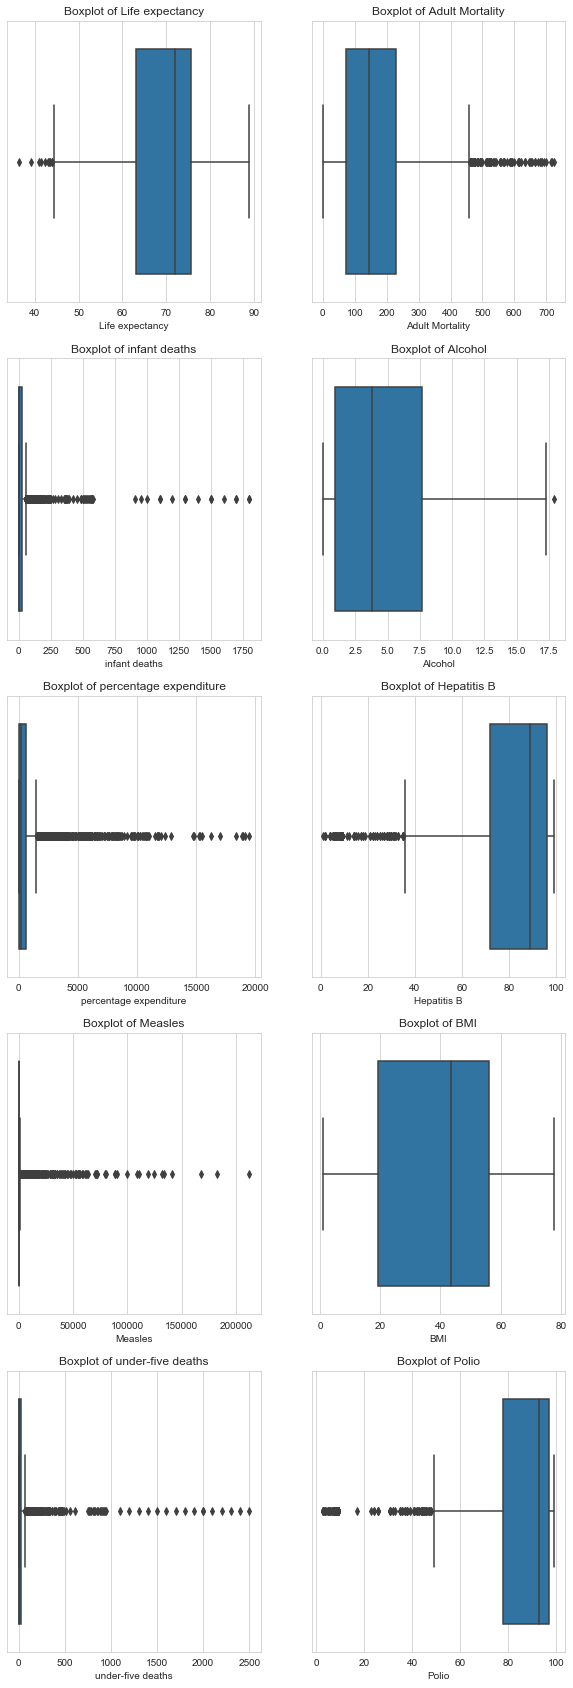

In [447]:
#plotting figure with figure size
plt.figure(figsize=(10,30))

#subpoltting the graphs
plt.subplot(5,2,1)
sns.boxplot(life_expectancy_c["Life expectancy"]) #boxplot to see outliers
plt.title("Boxplot of Life expectancy")

plt.subplot(5,2,2)
sns.boxplot(life_expectancy_c["Adult Mortality"])
plt.title("Boxplot of Adult Mortality")

plt.subplot(5,2,3)
sns.boxplot(life_expectancy_c["infant deaths"])
plt.title("Boxplot of infant deaths")

plt.subplot(5,2,4)
sns.boxplot(life_expectancy_c["Alcohol"])
plt.title("Boxplot of Alcohol")

plt.subplot(5,2,5)
sns.boxplot(life_expectancy_c["percentage expenditure"])
plt.title("Boxplot of percentage expenditure")

plt.subplot(5,2,6)
sns.boxplot(life_expectancy_c["Hepatitis B"])
plt.title("Boxplot of Hepatitis B")

plt.subplot(5,2,7)
sns.boxplot(life_expectancy_c["Measles"])
plt.title("Boxplot of Measles")

plt.subplot(5,2,8)
sns.boxplot(life_expectancy_c["BMI"])
plt.title("Boxplot of BMI")

plt.subplot(5,2,9)
sns.boxplot(life_expectancy_c["under-five deaths"])
plt.title("Boxplot of under-five deaths")

plt.subplot(5,2,10)
sns.boxplot(life_expectancy_c["Polio"])
plt.title("Boxplot of Polio")



plt.show()


Observation:
- life expectancy, Hepatitis B got outliers which is outside the lower quartile.
- other got outliers outside the upper quartile.
- we can see lots of outliers

Another half of features boxplot:

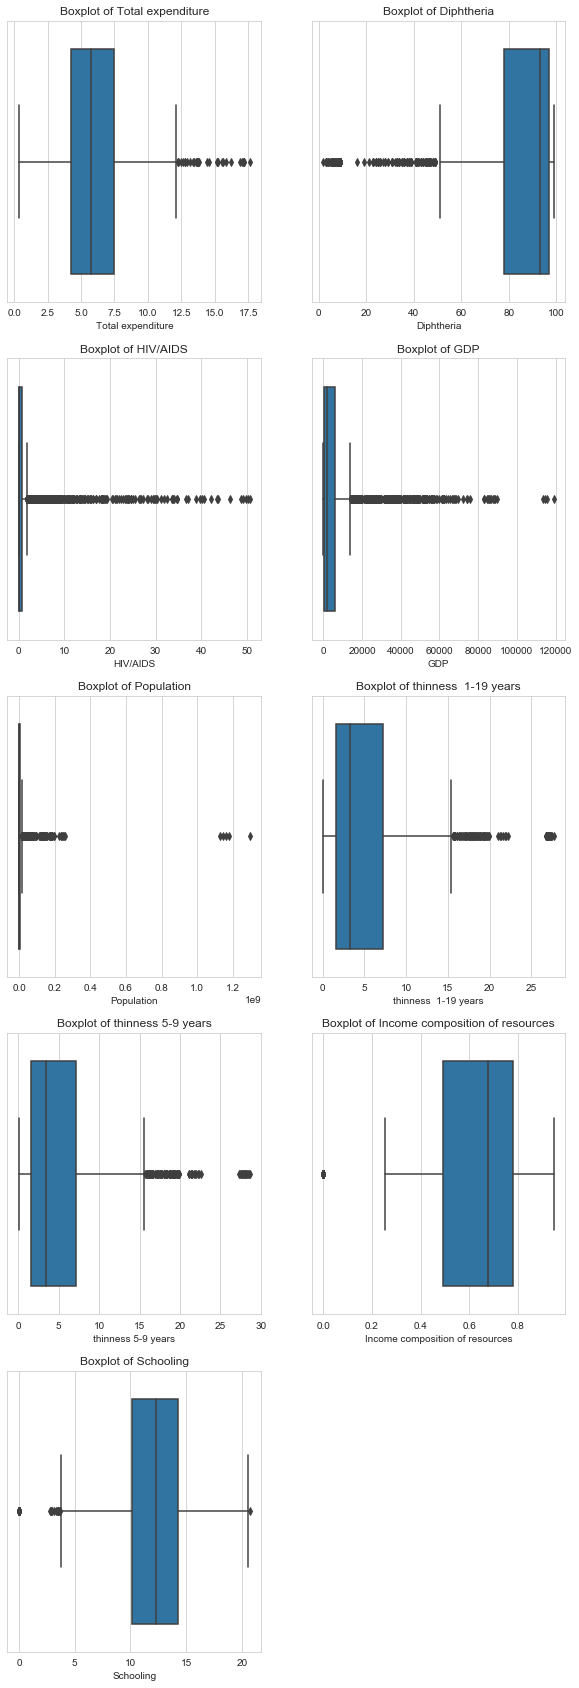

In [448]:

#plotting figure with figure size
plt.figure(figsize=(10,30))

#subplottong the graph
#using boxplot for visualization
plt.subplot(5,2,1)
sns.boxplot(life_expectancy_c["Total expenditure"])
plt.title("Boxplot of Total expenditure")

plt.subplot(5,2,2)
sns.boxplot(life_expectancy_c["Diphtheria"])
plt.title("Boxplot of Diphtheria")

plt.subplot(5,2,3)
sns.boxplot(life_expectancy_c["HIV/AIDS"])
plt.title("Boxplot of HIV/AIDS")

plt.subplot(5,2,4)
sns.boxplot(life_expectancy_c["GDP"])
plt.title("Boxplot of GDP")

plt.subplot(5,2,5)
sns.boxplot(life_expectancy_c["Population"])
plt.title("Boxplot of Population")

plt.subplot(5,2,6)
sns.boxplot(life_expectancy_c["thinness  1-19 years"])
plt.title("Boxplot of thinness  1-19 years")

plt.subplot(5,2,7)
sns.boxplot(life_expectancy_c["thinness 5-9 years"])
plt.title("Boxplot of thinness 5-9 years")

plt.subplot(5,2,8)
sns.boxplot(life_expectancy_c["Income composition of resources"])
plt.title("Boxplot of Income composition of resources")

plt.subplot(5,2,9)
sns.boxplot(life_expectancy_c["Schooling"])
plt.title("Boxplot of Schooling")


plt.show()


Observation:
From boxplot, we can see there is lots of outliers,

- Diptheria, Income composition of resources got outliers outside the lower quartile. 
- Schooling shows both way outliers.
- Rest, got outliers outside the upper quartile. 
- Actually the data are from all around the world, and there is some coutries which are really under-developed or called developing and some are highly-developed/developed. I think all the outliers in the data does make sense because of there accessibility to the needs in proper time.



#### Tukey's Method: Outlier Detector

Another Method to find outliers using IQR(Interquartile Range) method.
To find total numbers of outliers.
I am using these method because it uses IQR method, which is used by boxplot, and I have already used boxplot as visualization, and want to see total numbers of outliers using IQR.

In [449]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
Q1 = life_expectancy_c.quantile(0.25)
Q3 = life_expectancy_c.quantile(0.75)

iqr = Q3 - Q1

for threshold in np.arange(1,5,0.5):
    min_val = Q1 - (iqr*threshold)
    max_val = Q3 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expectancy_c > max_val) 
                      | (life_expectancy_c < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 5440
The score threshold is: 1.5
Number of outliers is: 4125
The score threshold is: 2.0
Number of outliers is: 3226
The score threshold is: 2.5
Number of outliers is: 2760
The score threshold is: 3.0
Number of outliers is: 2322
The score threshold is: 3.5
Number of outliers is: 2132
The score threshold is: 4.0
Number of outliers is: 1641
The score threshold is: 4.5
Number of outliers is: 1531


Observation: 
- Using tukeys method, we can see total numbers of outliers in differet threshold. 
- Here, we can see there is higher number of outliers in different threshold.
- About 4125 when threshold is 1.5

### Winsorization for Limiting Outliers:
One way of limiting the outlier values, 

We can cap the values of the outliers by assigning them new values to see its correlation later.
Winsorization can be used one way or two way technique, where we can limit lowest end or highest end, so we cap both end outliers.

In [450]:
# two way winsorization limiting both ends
from scipy.stats.mstats import winsorize

#creating new features winsorizing existing features
life_expectancy_c["winsorized_Life"] = winsorized_views = winsorize(life_expectancy_c["Life expectancy"], (0.05, 0.05))
life_expectancy_c["winsorized_Adult"] = winsorized_views = winsorize(life_expectancy_c["Adult Mortality"], (0.05, 0.05))
life_expectancy_c["winsorized_infant"] = winsorized_views = winsorize(life_expectancy_c["infant deaths"], (0.05, 0.05))
life_expectancy_c["winsorized_Alcohol"] = winsorized_views = winsorize(life_expectancy_c["Alcohol"], (0.05, 0.05))
life_expectancy_c["winsorized_perexp"] = winsorized_views = winsorize(life_expectancy_c["percentage expenditure"], (0.05, 0.05))
life_expectancy_c["winsorized_Hep"] = winsorized_views = winsorize(life_expectancy_c["Hepatitis B"], (0.05, 0.05))
life_expectancy_c["winsorized_Measles"] = winsorized_views = winsorize(life_expectancy_c["Measles"], (0.05, 0.05))
life_expectancy_c["winsorized_BMI"]=winsorized_views = winsorize(life_expectancy_c["BMI"], (0.05, 0.05))
life_expectancy_c["winsorized_under-five"]=winsorized_views = winsorize(life_expectancy_c["under-five deaths"], (0.05, 0.05))
life_expectancy_c["winsorized_Polio"]=winsorized_views= winsorize(life_expectancy_c["Polio"], (0.05, 0.05))
life_expectancy_c["winsorized_Totexp"]=winsorized_views= winsorize(life_expectancy_c["Total expenditure"], (0.05, 0.05))
life_expectancy_c["winsorized_Diphtheria"]=winsorized_views = winsorize(life_expectancy_c["Diphtheria"], (0.05, 0.05))
life_expectancy_c["winsorized_HIV/AIDS"]=winsorized_views = winsorize(life_expectancy_c["HIV/AIDS"], (0.05, 0.05))
life_expectancy_c["winsorized_GDP"]=winsorized_views = winsorize(life_expectancy_c["GDP"], (0.05, 0.05))
life_expectancy_c["winsorized_Pop"]=winsorized_views = winsorize(life_expectancy_c["Population"], (0.05, 0.05))
life_expectancy_c["winsorized_thin1"]=winsorized_views = winsorize(life_expectancy_c["thinness  1-19 years"], (0.05, 0.05))
life_expectancy_c["winsorized_thin5"]=winsorized_views = winsorize(life_expectancy_c["thinness 5-9 years"], (0.05, 0.05))
life_expectancy_c["winsorized_Inc"]=winsorized_views = winsorize(life_expectancy_c["Income composition of resources"], (0.05, 0.05))
life_expectancy_c["winsorized_Sch"]=winsorized_views = winsorize(life_expectancy_c["Schooling"], (0.05, 0.05))



#### Boxplot Visualization for outliers detection:
**Checking if winsorization limited the outliers or not by using boxplot visualization**:

Dividing boxplot visualization into two halfs to make it easier to view.

First half:

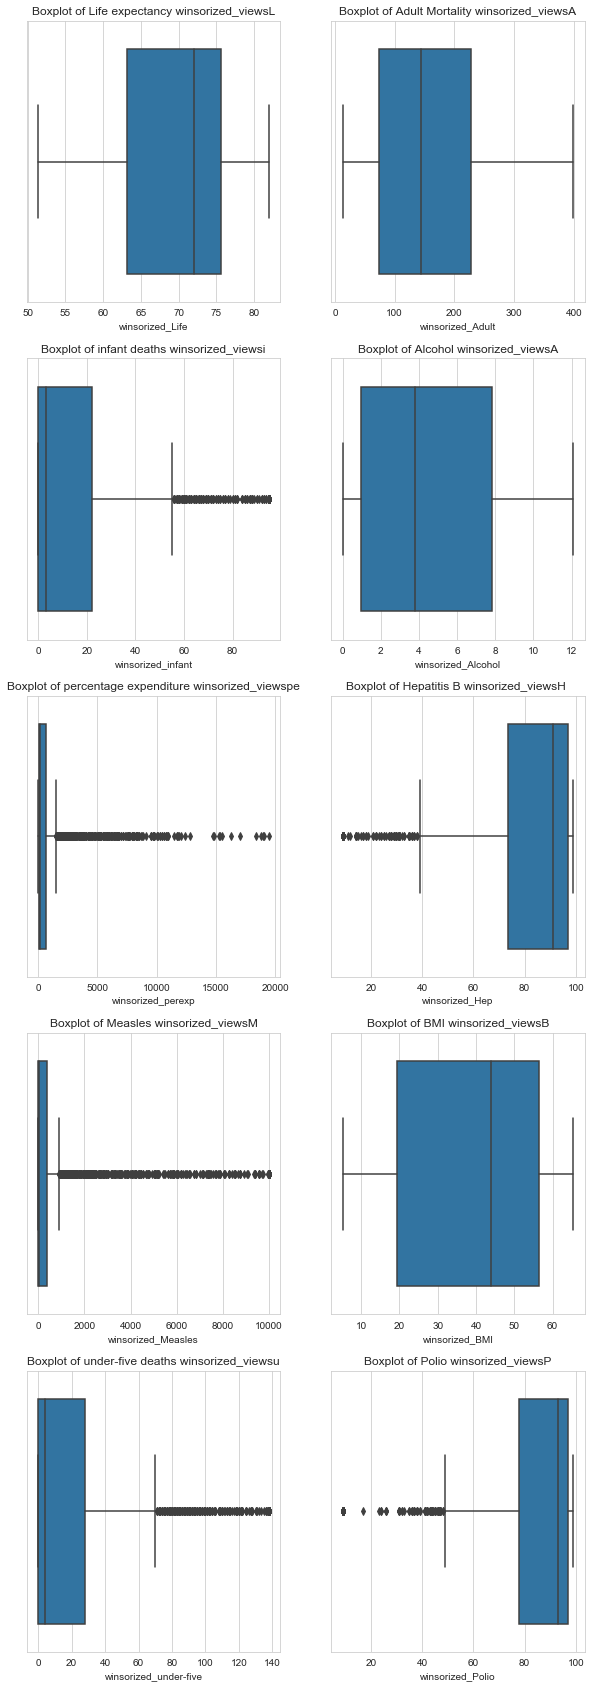

In [451]:
#plotting figure 
plt.figure(figsize=(10,30))


#subplottong the graph
#using boxplot for visualization
plt.subplot(5,2,1)
sns.boxplot(life_expectancy_c["winsorized_Life"])
plt.title("Boxplot of Life expectancy winsorized_viewsL")

plt.subplot(5,2,2)
sns.boxplot(life_expectancy_c["winsorized_Adult"])
plt.title("Boxplot of Adult Mortality winsorized_viewsA")

plt.subplot(5,2,3)
sns.boxplot(life_expectancy_c["winsorized_infant"])
plt.title("Boxplot of infant deaths winsorized_viewsi")

plt.subplot(5,2,4)
sns.boxplot(life_expectancy_c["winsorized_Alcohol"])
plt.title("Boxplot of Alcohol winsorized_viewsA")

plt.subplot(5,2,5)
sns.boxplot(life_expectancy_c["winsorized_perexp"])
plt.title("Boxplot of percentage expenditure winsorized_viewspe")

plt.subplot(5,2,6)
sns.boxplot(life_expectancy_c["winsorized_Hep"])
plt.title("Boxplot of Hepatitis B winsorized_viewsH ")

plt.subplot(5,2,7)
sns.boxplot(life_expectancy_c["winsorized_Measles"])
plt.title("Boxplot of Measles winsorized_viewsM")

plt.subplot(5,2,8)
sns.boxplot(life_expectancy_c["winsorized_BMI"])
plt.title("Boxplot of BMI winsorized_viewsB")

plt.subplot(5,2,9)
sns.boxplot(life_expectancy_c["winsorized_under-five"])
plt.title("Boxplot of under-five deaths winsorized_viewsu")

plt.subplot(5,2,10)
sns.boxplot(life_expectancy_c["winsorized_Polio"])
plt.title("Boxplot of Polio winsorized_viewsP")



plt.show()


Observation:

- No more outliers on life expectancy, adult mortality, and alcohol.
- Some outliers were limited on infant death, under five death, and polio.



Another half of visualization:

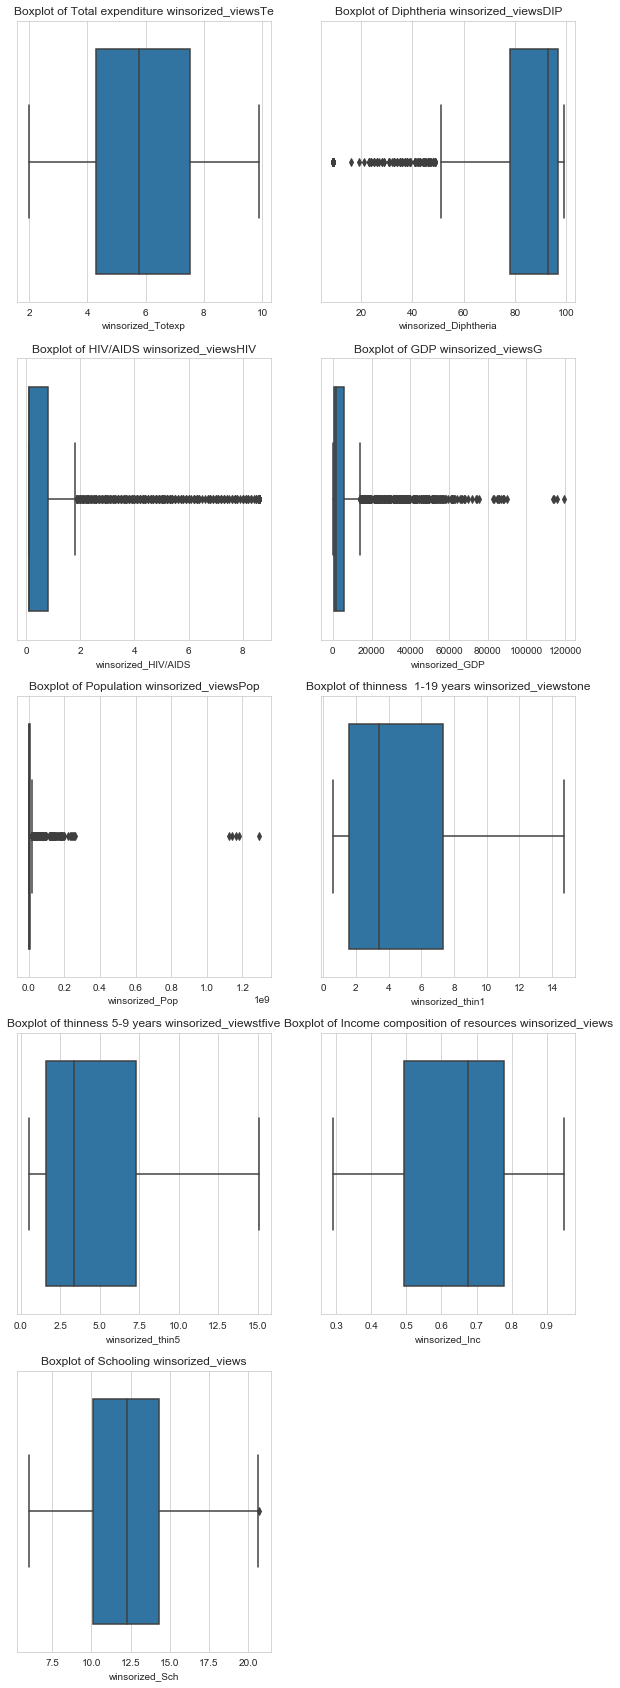

In [452]:

#plotting figure 
plt.figure(figsize=(10,30))

#subplottong the graph
#using boxplot for visualization
plt.subplot(5,2,1)
sns.boxplot(life_expectancy_c["winsorized_Totexp"])
plt.title("Boxplot of Total expenditure winsorized_viewsTe")

plt.subplot(5,2,2)
sns.boxplot(life_expectancy_c["winsorized_Diphtheria"])
plt.title("Boxplot of Diphtheria winsorized_viewsDIP")

plt.subplot(5,2,3)
sns.boxplot(life_expectancy_c["winsorized_HIV/AIDS"])
plt.title("Boxplot of HIV/AIDS winsorized_viewsHIV")

plt.subplot(5,2,4)
sns.boxplot(life_expectancy_c["winsorized_GDP"])
plt.title("Boxplot of GDP winsorized_viewsG")

plt.subplot(5,2,5)
sns.boxplot(life_expectancy_c["winsorized_Pop"])
plt.title("Boxplot of Population winsorized_viewsPop")

plt.subplot(5,2,6)
sns.boxplot(life_expectancy_c["winsorized_thin1"])
plt.title("Boxplot of thinness  1-19 years winsorized_viewstone")

plt.subplot(5,2,7)
sns.boxplot(life_expectancy_c["winsorized_thin5"])
plt.title("Boxplot of thinness 5-9 years winsorized_viewstfive")

plt.subplot(5,2,8)
sns.boxplot(life_expectancy_c["winsorized_Inc"])
plt.title("Boxplot of Income composition of resources winsorized_views")

plt.subplot(5,2,9)
sns.boxplot(life_expectancy_c["winsorized_Sch"])
plt.title("Boxplot of Schooling winsorized_views")


plt.show()


Observation:
- After, winsorization, we can see outliers is limited to some extent.
- No more outliers shown in total expenditure, population, thinness 1- 19 years, thinness 5- 9 years, schooling, income composition of resources.
- So winsorization helped to clean outliers in some of the features.

#### Tukey's Method: Outlier Detector after winsorization:
**To see any differences in total number of outliers**

In [453]:
life_exp_winskey= life_expectancy_c[["winsorized_Life", "winsorized_Adult", "winsorized_infant", "winsorized_Alcohol",
                                     "winsorized_perexp", "winsorized_Hep", "winsorized_Measles", "winsorized_BMI",
                                     "winsorized_under-five", "winsorized_Polio", "winsorized_Totexp", "winsorized_Diphtheria", 
                                     "winsorized_HIV/AIDS", "winsorized_GDP", "winsorized_Pop", "winsorized_thin1",
                                     "winsorized_thin5", "winsorized_Inc", "winsorized_Sch"
                                    ]]

# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
Q1 = life_exp_winskey.quantile(0.25)
Q3 = life_exp_winskey.quantile(0.75)

iqr = Q3 - Q1

for threshold in np.arange(1,5,0.5):
    min_val = Q1 - (iqr*threshold)
    max_val = Q3 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_exp_winskey > max_val) 
                      | (life_exp_winskey < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 5005
The score threshold is: 1.5
Number of outliers is: 3648
The score threshold is: 2.0
Number of outliers is: 3046
The score threshold is: 2.5
Number of outliers is: 2691
The score threshold is: 3.0
Number of outliers is: 2280
The score threshold is: 3.5
Number of outliers is: 1963
The score threshold is: 4.0
Number of outliers is: 1366
The score threshold is: 4.5
Number of outliers is: 1277


Observation:
- As, we can see after winsorization some of the outliers were capped, but not all.
- After winsorization, at threshold 1.0 outliers number went down from 5440 to 5005.
   - at threshold 1.5 outliers number went down from 4125 to 3648.
   - at threshold 2 outliers number went down from 3226 to 3046
   - at threshold 2.5 outliers number went down from 2760 to 2691
   - at threshold 3 outliers number went down from 2322 to 2280
   - at threshold 3.5 outliers number went down from 2132 to 1963
   - at threshold 4 outliers number went down from 1641 to 1366
   - at threshold 4.5 outliers number went down from 1531 to 1277

## Data Exploration:


#### Visualization for categorical variable: Status vs life expectancy 



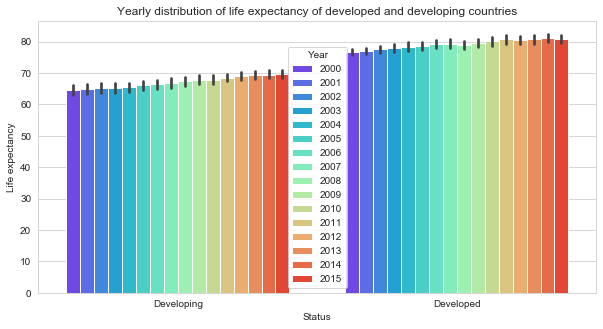

Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy, dtype: float64


In [454]:
# bar chart of status and life-expectancy
plt.figure(figsize=(10,5))
sns.barplot(life_expectancy_c['Status'], life_expectancy_c['Life expectancy'], hue=life_expectancy_c['Year'], palette='rainbow')
plt.title('Yearly distribution of life expectancy of developed and developing countries' )
plt.show()
print(life_expectancy_c.groupby('Status')['Life expectancy'].mean())

Observation:
- Developed countries have higher life expectancy than developing countries and it is increasing every year.
- Developed average life expectancy is about 79 and developing average life expectancy is about 67, which is really far from each other.
- we can see status(predictor) affects our target (life expectancy) 

#### Bivariate analysis: Target(life expectancy) vs. Predictor(independent features)

To see the relationship between life expectancy and all other features, I will use scatterplot for visualization:

#### Scatterplot using seaborn for Visualization to see the correlation between target variables and other features.

I am using scatterplot, because it is really good with numerical values.


Lets do only half at a time to have a good view.

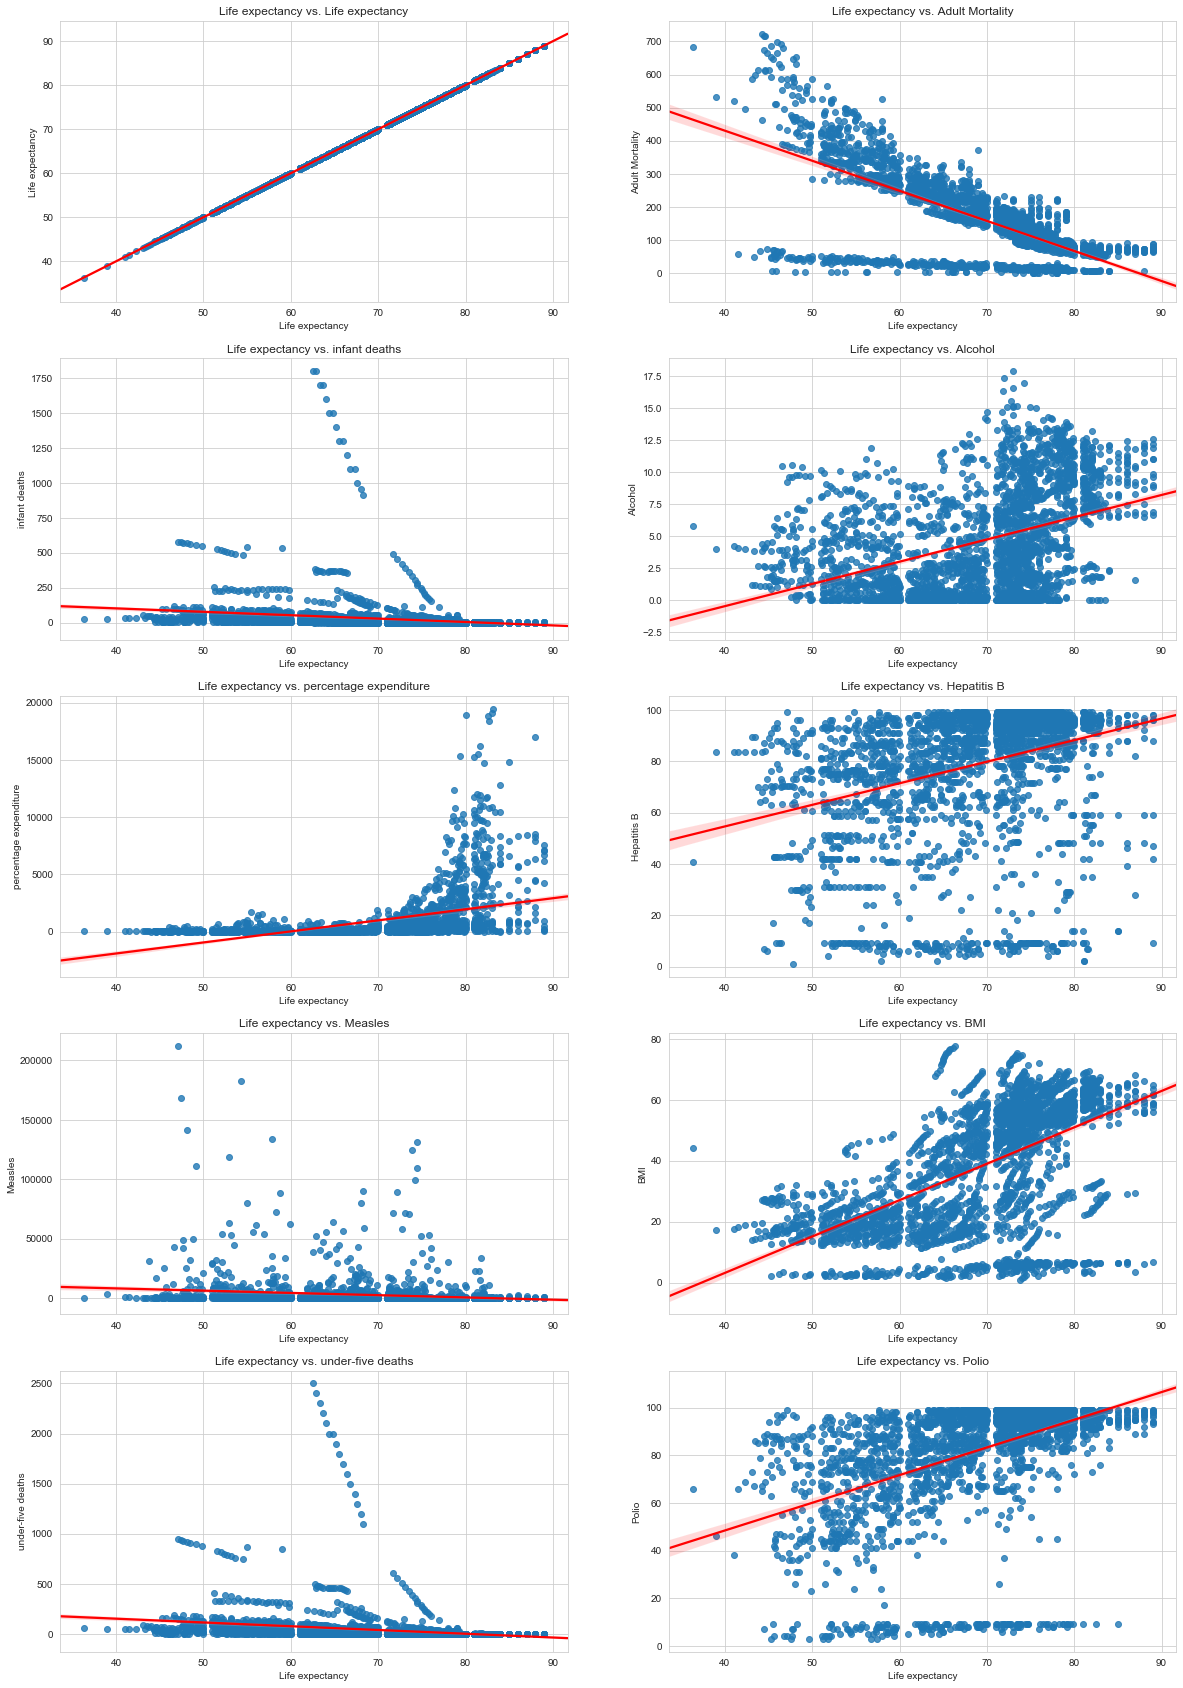

In [455]:
#plotting figure
plt.figure(figsize=(20,30))

#subplots of scatteplot
plt.subplot(5,2,1)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Life expectancy"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Life expectancy")

plt.subplot(5,2,2)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Adult Mortality"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Adult Mortality")

plt.subplot(5,2,3)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["infant deaths"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. infant deaths")

plt.subplot(5,2,4)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Alcohol"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Alcohol")

plt.subplot(5,2,5)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["percentage expenditure"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. percentage expenditure")

plt.subplot(5,2,6)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Hepatitis B"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Hepatitis B")

plt.subplot(5,2,7)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Measles"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Measles")

plt.subplot(5,2,8)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["BMI"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. BMI")

plt.subplot(5,2,9)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["under-five deaths"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. under-five deaths")

plt.subplot(5,2,10)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Polio"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Polio")




plt.show()


Observation:
- As we can see from scatterplot and regfit, target and Adult Mortality shows higly inverse correlation.
- Target and infant death shows minimal correlation and is negative.
- Target and Alcohol shows positive correlation.
- Target and percentage expenditure minimal positive correlation.
- Target and Hepatitis B shows positive correlation but has lots of outliers.
- Target and Measles shows almost no correlation, with lots of outliers.
- Target and BMI/Polio shows high positive corelation, also got lots of outliers.
- Target and underfive death shows almost no correlation.

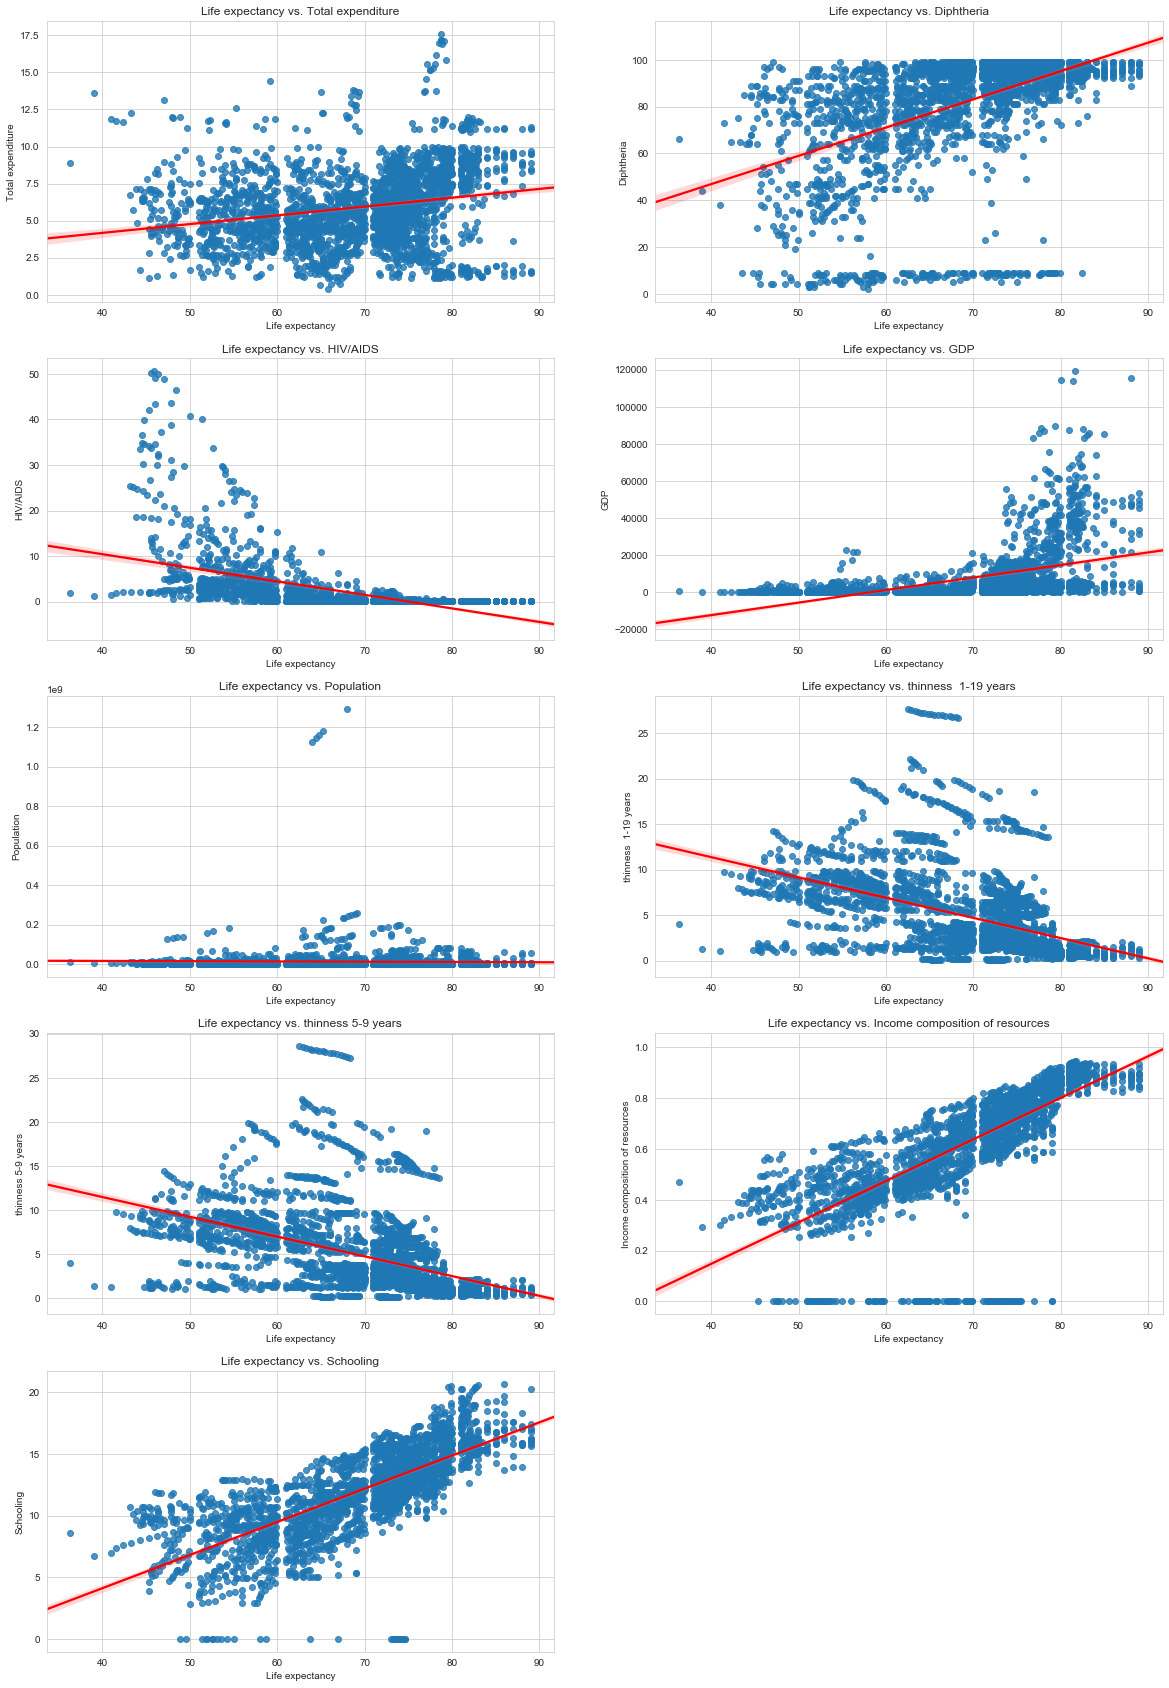

In [456]:
#plotting figure
plt.figure(figsize=(20,30))

#subplots of scatteplot
#scatterplot target vs other features
plt.subplot(5,2,1)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Total expenditure"], 
            line_kws={"color":"r"})
plt.title("Life expectancy vs. Total expenditure")

plt.subplot(5,2,2)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Diphtheria"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Diphtheria")

plt.subplot(5,2,3)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["HIV/AIDS"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. HIV/AIDS")

plt.subplot(5,2,4)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["GDP"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. GDP")

plt.subplot(5,2,5)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Population"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Population")

plt.subplot(5,2,6)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["thinness  1-19 years"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. thinness  1-19 years")

plt.subplot(5,2,7)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["thinness 5-9 years"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. thinness 5-9 years")

plt.subplot(5,2,8)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Income composition of resources"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Income composition of resources")

plt.subplot(5,2,9)
sns.regplot(life_expectancy_c["Life expectancy"], life_expectancy_c["Schooling"],
           line_kws={"color":"r"})
plt.title("Life expectancy vs. Schooling")


plt.show()


Observation:

- Target vs Schooling and target vs income composition shows highly positive correlation with minimum amount of outliers.
- Target vs ihinness 1-19 and target vs thinness 5-9 shows negative correlation with lots of outliers.
- Target vs population shows no correlation.
- Target vs GDP(positve corr) and HIV/AIDS(negative corr) shows same correlation but in opposite manner.
- Target vs diptheria shows positive correlation but has lots of outliers.
- Target vs total expenditure minimal positive correlation.

### Feature engineering:

#### Normalization and standardization:

Normalization of a variable into the [0,1] range (including 0 and 1).
Standardization of a variable so its mean becomes 0 and its standard deviation becomes 1.

#### Normalization on winsorized features:
The data is scaled to a fixed range - usually 0 to 1. It will end up with smaller standard deviation, which supress the effects of outliers. Trying to normalize features with limited outliers to get most out of it in modelling.

In [457]:
# normalizing the winsorized variables(rescaling) without using sklearn to avoid nan/infinity value.

life_expectancy_c["norm_winsorized_Life"] = (life_expectancy_c["winsorized_Life"]-life_expectancy_c["winsorized_Life"].min())/(life_expectancy_c["winsorized_Life"].max()-life_expectancy_c["winsorized_Life"].min())


life_expectancy_c["norm_winsorized_Adult"] = (life_expectancy_c["winsorized_Adult"]-life_expectancy_c["winsorized_Adult"].min())/(life_expectancy_c["winsorized_Adult"].max()-life_expectancy_c["winsorized_Adult"].min())

life_expectancy_c["norm_winsorized_infant"] = (life_expectancy_c["winsorized_infant"]-life_expectancy_c["winsorized_infant"].min())/(life_expectancy_c["winsorized_infant"].max()-life_expectancy_c["winsorized_infant"].min()) 


life_expectancy_c["norm_winsorized_Alcohol"] = (life_expectancy_c["winsorized_Alcohol"]-life_expectancy_c["winsorized_Alcohol"].min())/(life_expectancy_c["winsorized_Alcohol"].max()-life_expectancy_c["winsorized_Alcohol"].min())


life_expectancy_c["norm_winsorized_perexp"] = (life_expectancy_c["winsorized_perexp"]-life_expectancy_c["winsorized_perexp"].min())/(life_expectancy_c["winsorized_perexp"].max()-life_expectancy_c["winsorized_perexp"].min())

life_expectancy_c["norm_winsorized_Hep"] = (life_expectancy_c["winsorized_Hep"]-life_expectancy_c["winsorized_Hep"].min())/(life_expectancy_c["winsorized_Hep"].max()-life_expectancy_c["winsorized_Hep"].min())


life_expectancy_c["norm_winsorized_Measles"] = (life_expectancy_c["winsorized_Measles"]-life_expectancy_c["winsorized_Measles"].min())/(life_expectancy_c["winsorized_Measles"].max()-life_expectancy_c["winsorized_Measles"].min())


life_expectancy_c["norm_winsorized_BMI"]= (life_expectancy_c["winsorized_BMI"]-life_expectancy_c["winsorized_BMI"].min())/(life_expectancy_c["winsorized_BMI"].max()-life_expectancy_c["winsorized_BMI"].min())


life_expectancy_c["norm_winsorized_under-five"]= (life_expectancy_c["winsorized_under-five"]-life_expectancy_c["winsorized_under-five"].min())/(life_expectancy_c["winsorized_under-five"].max()-life_expectancy_c["winsorized_under-five"].min())


life_expectancy_c["norm_winsorized_Polio"]= (life_expectancy_c["winsorized_Polio"]-life_expectancy_c["winsorized_Polio"].min())/(life_expectancy_c["winsorized_Polio"].max()-life_expectancy_c["winsorized_Polio"].min())

life_expectancy_c["norm_winsorized_Totexp"]= (life_expectancy_c["winsorized_Totexp"]-life_expectancy_c["winsorized_Totexp"].min())/(life_expectancy_c["winsorized_Totexp"].max()-life_expectancy_c["winsorized_Totexp"].min())


life_expectancy_c["norm_winsorized_Diphtheria"]= (life_expectancy_c["winsorized_Diphtheria"]-life_expectancy_c["winsorized_Diphtheria"].min())/(life_expectancy_c["winsorized_Diphtheria"].max()-life_expectancy_c["winsorized_Diphtheria"].min())


life_expectancy_c["norm_winsorized_HIV/AIDS"]= (life_expectancy_c["winsorized_HIV/AIDS"]-life_expectancy_c["winsorized_HIV/AIDS"].min())/(life_expectancy_c["winsorized_HIV/AIDS"].max()-life_expectancy_c["winsorized_HIV/AIDS"].min())


life_expectancy_c["norm_winsorized_GDP"]= (life_expectancy_c["winsorized_GDP"]-life_expectancy_c["winsorized_GDP"].min())/(life_expectancy_c["winsorized_GDP"].max()-life_expectancy_c["winsorized_GDP"].min())


life_expectancy_c["norm_winsorized_Pop"]= (life_expectancy_c["winsorized_Pop"]-life_expectancy_c["winsorized_Pop"].min())/(life_expectancy_c["winsorized_Pop"].max()-life_expectancy_c["winsorized_Pop"].min())


life_expectancy_c["norm_winsorized_thin1"]= (life_expectancy_c["winsorized_thin1"]-life_expectancy_c["winsorized_thin1"].min())/(life_expectancy_c["winsorized_thin1"].max()-life_expectancy_c["winsorized_thin1"].min())

life_expectancy_c["norm_winsorized_thin5"]= (life_expectancy_c["winsorized_thin5"]-life_expectancy_c["winsorized_thin5"].min())/(life_expectancy_c["winsorized_thin5"].max()-life_expectancy_c["winsorized_thin5"].min())

life_expectancy_c["norm_winsorized_Inc"]= (life_expectancy_c["winsorized_Inc"]-life_expectancy_c["winsorized_Inc"].min())/(life_expectancy_c["winsorized_Inc"].max()-life_expectancy_c["winsorized_Inc"].min())


life_expectancy_c["norm_winsorized_Sch"]= (life_expectancy_c["winsorized_Sch"]-life_expectancy_c["winsorized_Sch"].min())/(life_expectancy_c["winsorized_Sch"].max()-life_expectancy_c["winsorized_Sch"].min())






#### Visualization through scatter plot to see normalized data of winsorized features vs winsorized features:

#### Scatterplot:

Half of features first:

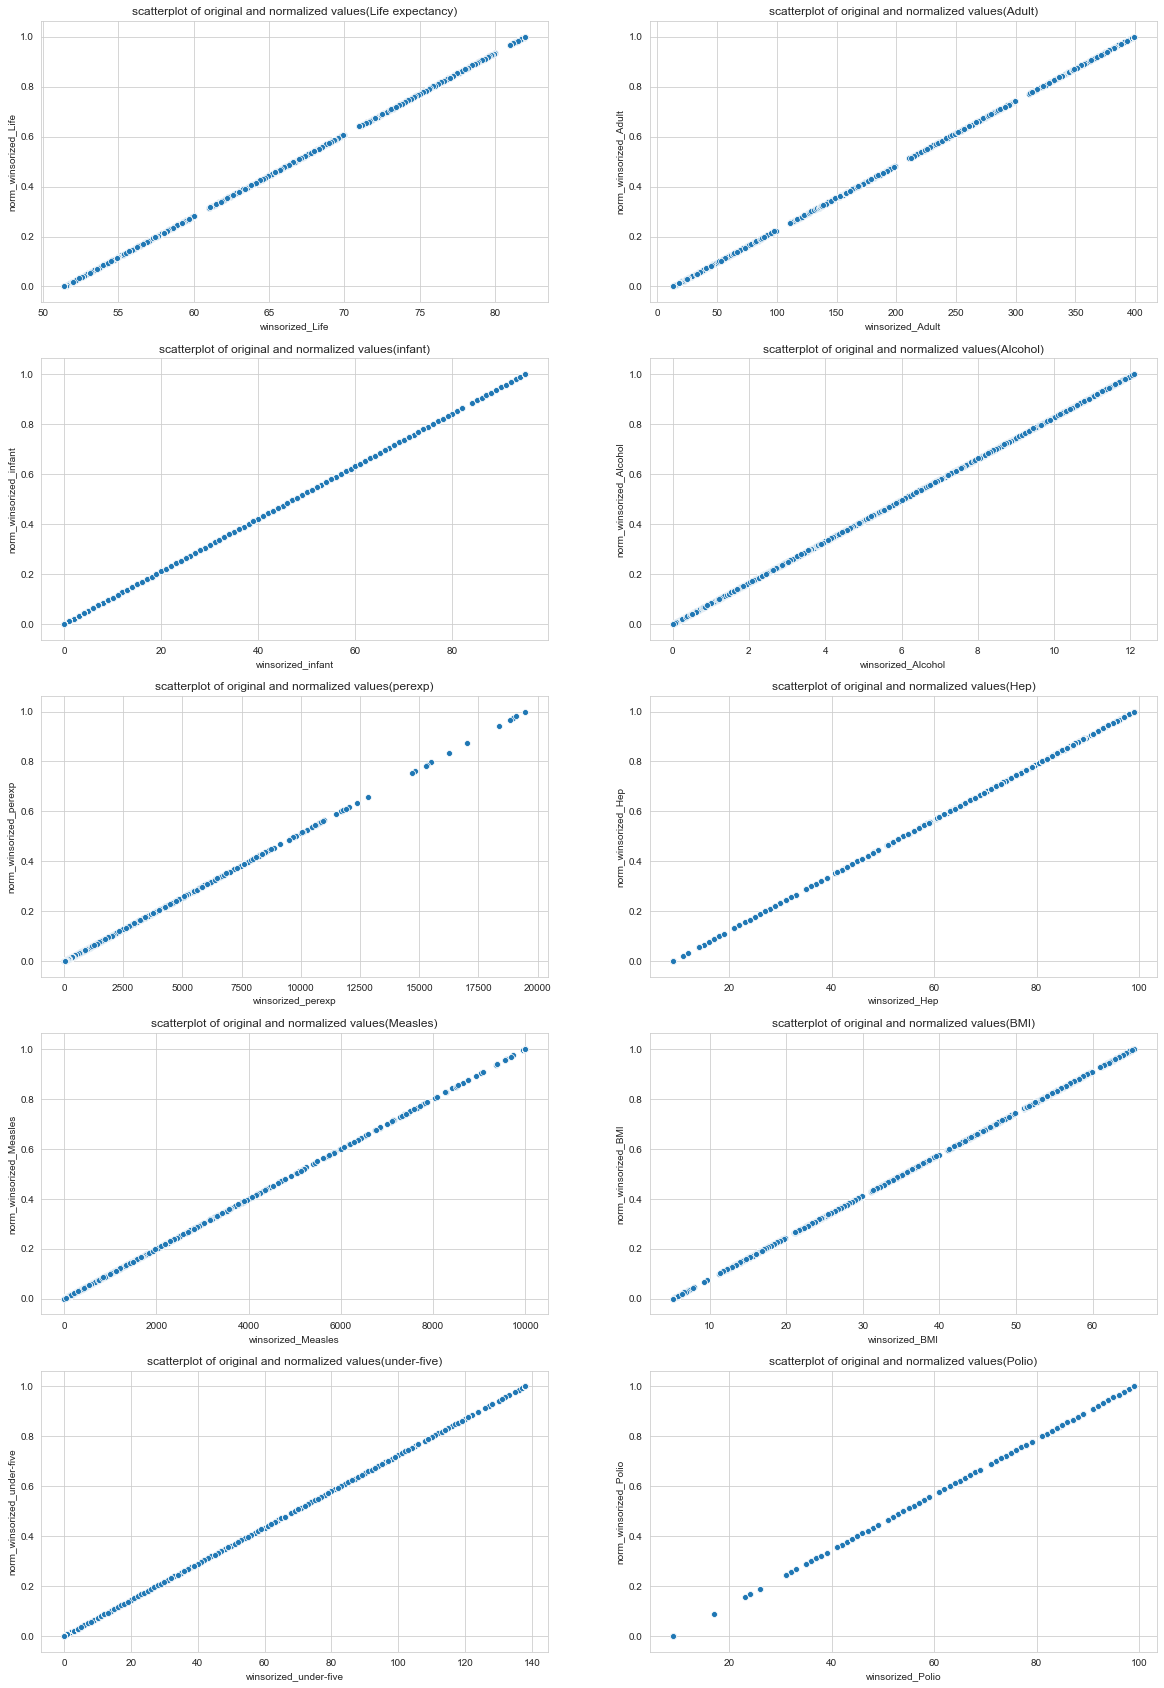

In [458]:
plt.figure(figsize=(20,30))

# draw the scatter plot to normalization between original winsorized data and normalized-winsorized data
plt.subplot(5,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Life"], life_expectancy_c["norm_winsorized_Life"])
plt.title("scatterplot of original and normalized values(Life expectancy)")

plt.subplot(5,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Adult"], life_expectancy_c["norm_winsorized_Adult"])
plt.title("scatterplot of original and normalized values(Adult)")

plt.subplot(5,2,3)
sns.scatterplot(life_expectancy_c["winsorized_infant"], life_expectancy_c["norm_winsorized_infant"])
plt.title("scatterplot of original and normalized values(infant)")

plt.subplot(5,2,4)
sns.scatterplot(life_expectancy_c["winsorized_Alcohol"], life_expectancy_c["norm_winsorized_Alcohol"])
plt.title("scatterplot of original and normalized values(Alcohol)")

plt.subplot(5,2,5)
sns.scatterplot(life_expectancy_c["winsorized_perexp"], life_expectancy_c["norm_winsorized_perexp"])
plt.title("scatterplot of original and normalized values(perexp)")

plt.subplot(5,2,6)
sns.scatterplot(life_expectancy_c["winsorized_Hep"], life_expectancy_c["norm_winsorized_Hep"])
plt.title("scatterplot of original and normalized values(Hep)")

plt.subplot(5,2,7)
sns.scatterplot(life_expectancy_c["winsorized_Measles"], life_expectancy_c["norm_winsorized_Measles"])
plt.title("scatterplot of original and normalized values(Measles)")

plt.subplot(5,2,8)
sns.scatterplot(life_expectancy_c["winsorized_BMI"], life_expectancy_c["norm_winsorized_BMI"])
plt.title("scatterplot of original and normalized values(BMI)")


plt.subplot(5,2,9)
sns.scatterplot(life_expectancy_c["winsorized_under-five"], life_expectancy_c["norm_winsorized_under-five"])
plt.title("scatterplot of original and normalized values(under-five)")

plt.subplot(5,2,10)
sns.scatterplot(life_expectancy_c["winsorized_Polio"], life_expectancy_c["norm_winsorized_Polio"])
plt.title("scatterplot of original and normalized values(Polio)")




plt.show()

Observation:
All the data looks normalized to 1.

Another half of features for visualization through scatterplot:

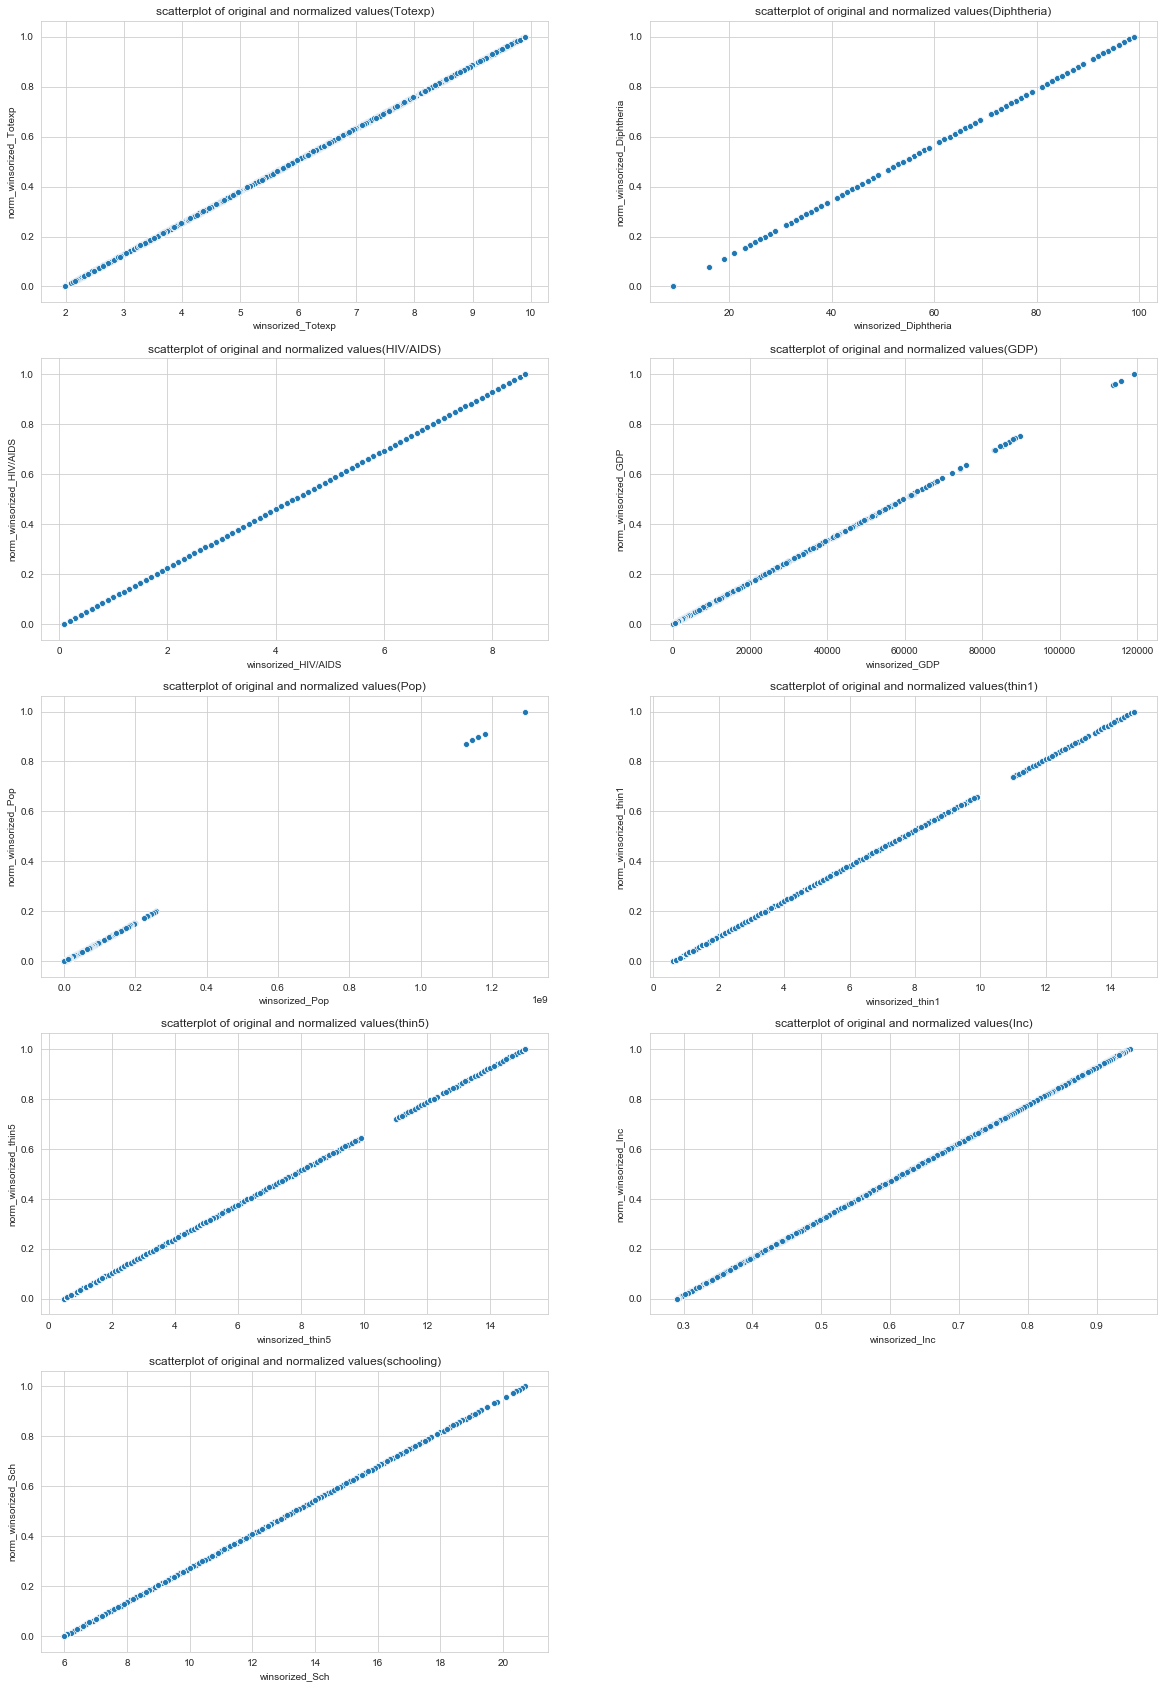

In [459]:
plt.figure(figsize=(20,30))

# draw the scatter plot to normalization between original winsorized data and normalized-winsorized data

#subplotting the graphs
plt.subplot(5,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Totexp"], life_expectancy_c["norm_winsorized_Totexp"])
plt.title("scatterplot of original and normalized values(Totexp)")


plt.subplot(5,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Diphtheria"], life_expectancy_c["norm_winsorized_Diphtheria"])
plt.title("scatterplot of original and normalized values(Diphtheria)")

plt.subplot(5,2,3)
sns.scatterplot(life_expectancy_c["winsorized_HIV/AIDS"], life_expectancy_c["norm_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and normalized values(HIV/AIDS)")

plt.subplot(5,2,4)
sns.scatterplot(life_expectancy_c["winsorized_GDP"], life_expectancy_c["norm_winsorized_GDP"])
plt.title("scatterplot of original and normalized values(GDP)")


plt.subplot(5,2,5)
sns.scatterplot(life_expectancy_c["winsorized_Pop"], life_expectancy_c["norm_winsorized_Pop"])
plt.title("scatterplot of original and normalized values(Pop)")


plt.subplot(5,2,6)
sns.scatterplot(life_expectancy_c["winsorized_thin1"], life_expectancy_c["norm_winsorized_thin1"])
plt.title("scatterplot of original and normalized values(thin1)")


plt.subplot(5,2,7)
sns.scatterplot(life_expectancy_c["winsorized_thin5"], life_expectancy_c["norm_winsorized_thin5"])
plt.title("scatterplot of original and normalized values(thin5)")


plt.subplot(5,2,8)
sns.scatterplot(life_expectancy_c["winsorized_Inc"], life_expectancy_c["norm_winsorized_Inc"])
plt.title("scatterplot of original and normalized values(Inc)")

plt.subplot(5,2,9)
sns.scatterplot(life_expectancy_c["winsorized_Sch"], life_expectancy_c["norm_winsorized_Sch"])
plt.title("scatterplot of original and normalized values(schooling)")




plt.show()

Observation:
All the winsorized data are normalized.

### Standardization:
Standardization helps to keep mean of 0 and standard deviation to 1. It will give the features there standard normal distribution. 

In [460]:
from sklearn.preprocessing import scale

# Standardizing the winsorized variables(rescaling)

life_expectancy_c["scaled_winsorized_Life"] = scale(life_expectancy_c["winsorized_Life"])
life_expectancy_c["scaled_winsorized_Adult"] = scale(life_expectancy_c["winsorized_Adult"])

life_expectancy_c["scaled_winsorized_infant"] =  scale(life_expectancy_c["winsorized_infant"])

life_expectancy_c["scaled_winsorized_Alcohol"] = scale(life_expectancy_c["winsorized_Alcohol"])

life_expectancy_c["scaled_winsorized_perexp"] = scale(life_expectancy_c["winsorized_perexp"])

life_expectancy_c["scaled_winsorized_Hep"] = scale(life_expectancy_c["winsorized_Hep"])

life_expectancy_c["scaled_winsorized_Measles"] = scale(life_expectancy_c["winsorized_Measles"])

life_expectancy_c["scaled_winsorized_BMI"]= scale(life_expectancy_c["winsorized_BMI"])

life_expectancy_c["scaled_winsorized_under-five"]= scale(life_expectancy_c["winsorized_under-five"])

life_expectancy_c["scaled_winsorized_Polio"]= scale(life_expectancy_c["winsorized_Polio"])

life_expectancy_c["scaled_winsorized_Totexp"]= scale(life_expectancy_c["winsorized_Totexp"])

life_expectancy_c["scaled_winsorized_Diphtheria"]= scale(life_expectancy_c["winsorized_Diphtheria"])

life_expectancy_c["scaled_winsorized_HIV/AIDS"]= scale(life_expectancy_c["winsorized_HIV/AIDS"])

life_expectancy_c["scaled_winsorized_GDP"]= scale(life_expectancy_c["winsorized_GDP"])

life_expectancy_c["scaled_winsorized_Pop"]= scale(life_expectancy_c["winsorized_Pop"])

life_expectancy_c["scaled_winsorized_thin1"]= scale(life_expectancy_c["winsorized_thin1"])

life_expectancy_c["scaled_winsorized_thin5"]= scale(life_expectancy_c["winsorized_thin5"])

life_expectancy_c["scaled_winsorized_Inc"]= scale(life_expectancy_c["winsorized_Inc"])

life_expectancy_c["scaled_winsorized_Sch"]= scale(life_expectancy_c["winsorized_Sch"])





#### Visualization through scatter plot to see standardized data of winsorized features vs winsorized features:

#### Scatterplot:

Half of features first:

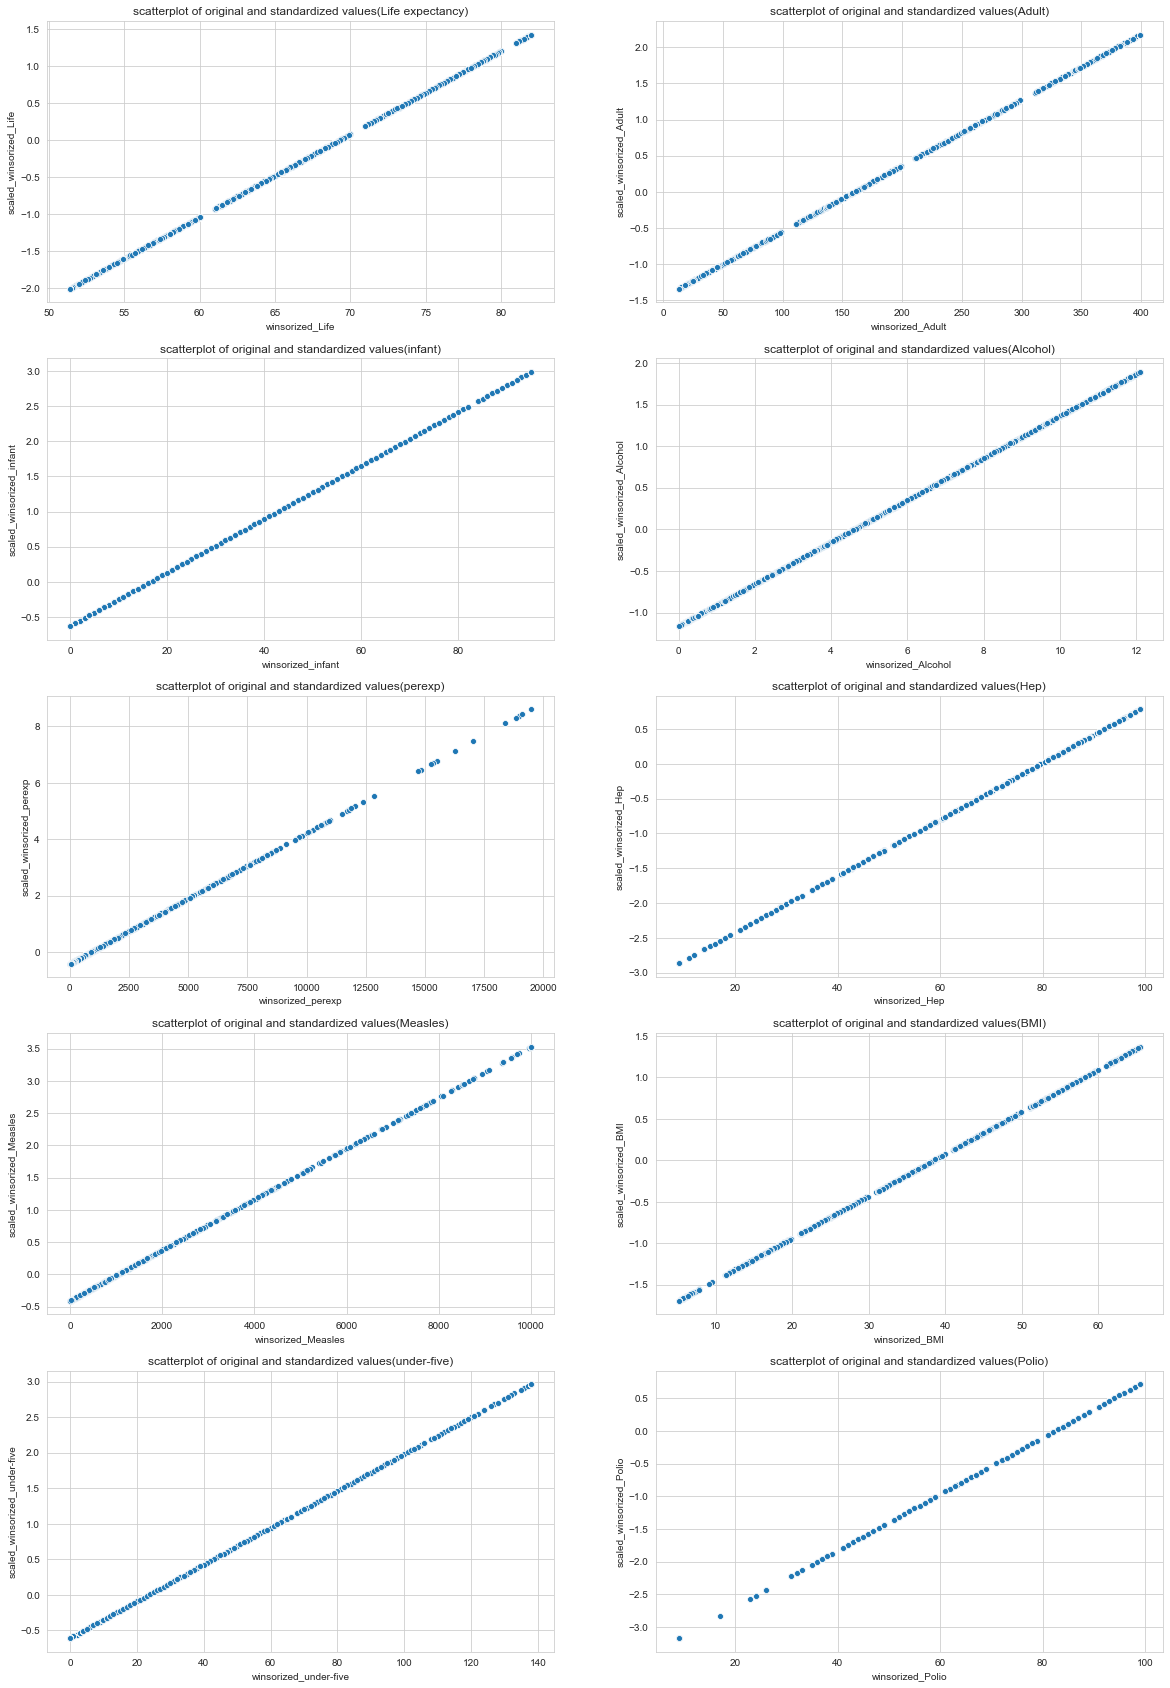

In [461]:
#plotting figure with figure size
plt.figure(figsize=(20,30))
# draw the scatter plot using seaborn for all the winsorized and scaled columns

#subplotting the graphs
plt.subplot(5,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Life"], life_expectancy_c["scaled_winsorized_Life"])
plt.title("scatterplot of original and standardized values(Life expectancy)")

plt.subplot(5,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Adult"], life_expectancy_c["scaled_winsorized_Adult"])
plt.title("scatterplot of original and standardized values(Adult)")

plt.subplot(5,2,3)
sns.scatterplot(life_expectancy_c["winsorized_infant"], life_expectancy_c["scaled_winsorized_infant"])
plt.title("scatterplot of original and standardized values(infant)")

plt.subplot(5,2,4)
sns.scatterplot(life_expectancy_c["winsorized_Alcohol"], life_expectancy_c["scaled_winsorized_Alcohol"])
plt.title("scatterplot of original and standardized values(Alcohol)")

plt.subplot(5,2,5)
sns.scatterplot(life_expectancy_c["winsorized_perexp"], life_expectancy_c["scaled_winsorized_perexp"])
plt.title("scatterplot of original and standardized values(perexp)")

plt.subplot(5,2,6)
sns.scatterplot(life_expectancy_c["winsorized_Hep"], life_expectancy_c["scaled_winsorized_Hep"])
plt.title("scatterplot of original and standardized values(Hep)")

plt.subplot(5,2,7)
sns.scatterplot(life_expectancy_c["winsorized_Measles"], life_expectancy_c["scaled_winsorized_Measles"])
plt.title("scatterplot of original and standardized values(Measles)")

plt.subplot(5,2,8)
sns.scatterplot(life_expectancy_c["winsorized_BMI"], life_expectancy_c["scaled_winsorized_BMI"])
plt.title("scatterplot of original and standardized values(BMI)")


plt.subplot(5,2,9)
sns.scatterplot(life_expectancy_c["winsorized_under-five"], life_expectancy_c["scaled_winsorized_under-five"])
plt.title("scatterplot of original and standardized values(under-five)")

plt.subplot(5,2,10)
sns.scatterplot(life_expectancy_c["winsorized_Polio"], life_expectancy_c["scaled_winsorized_Polio"])
plt.title("scatterplot of original and standardized values(Polio)")




plt.show()


Observation:
standardized data scaled to there mean 0 and standard deviation 1

Another half of features for visualization through scatterplot:

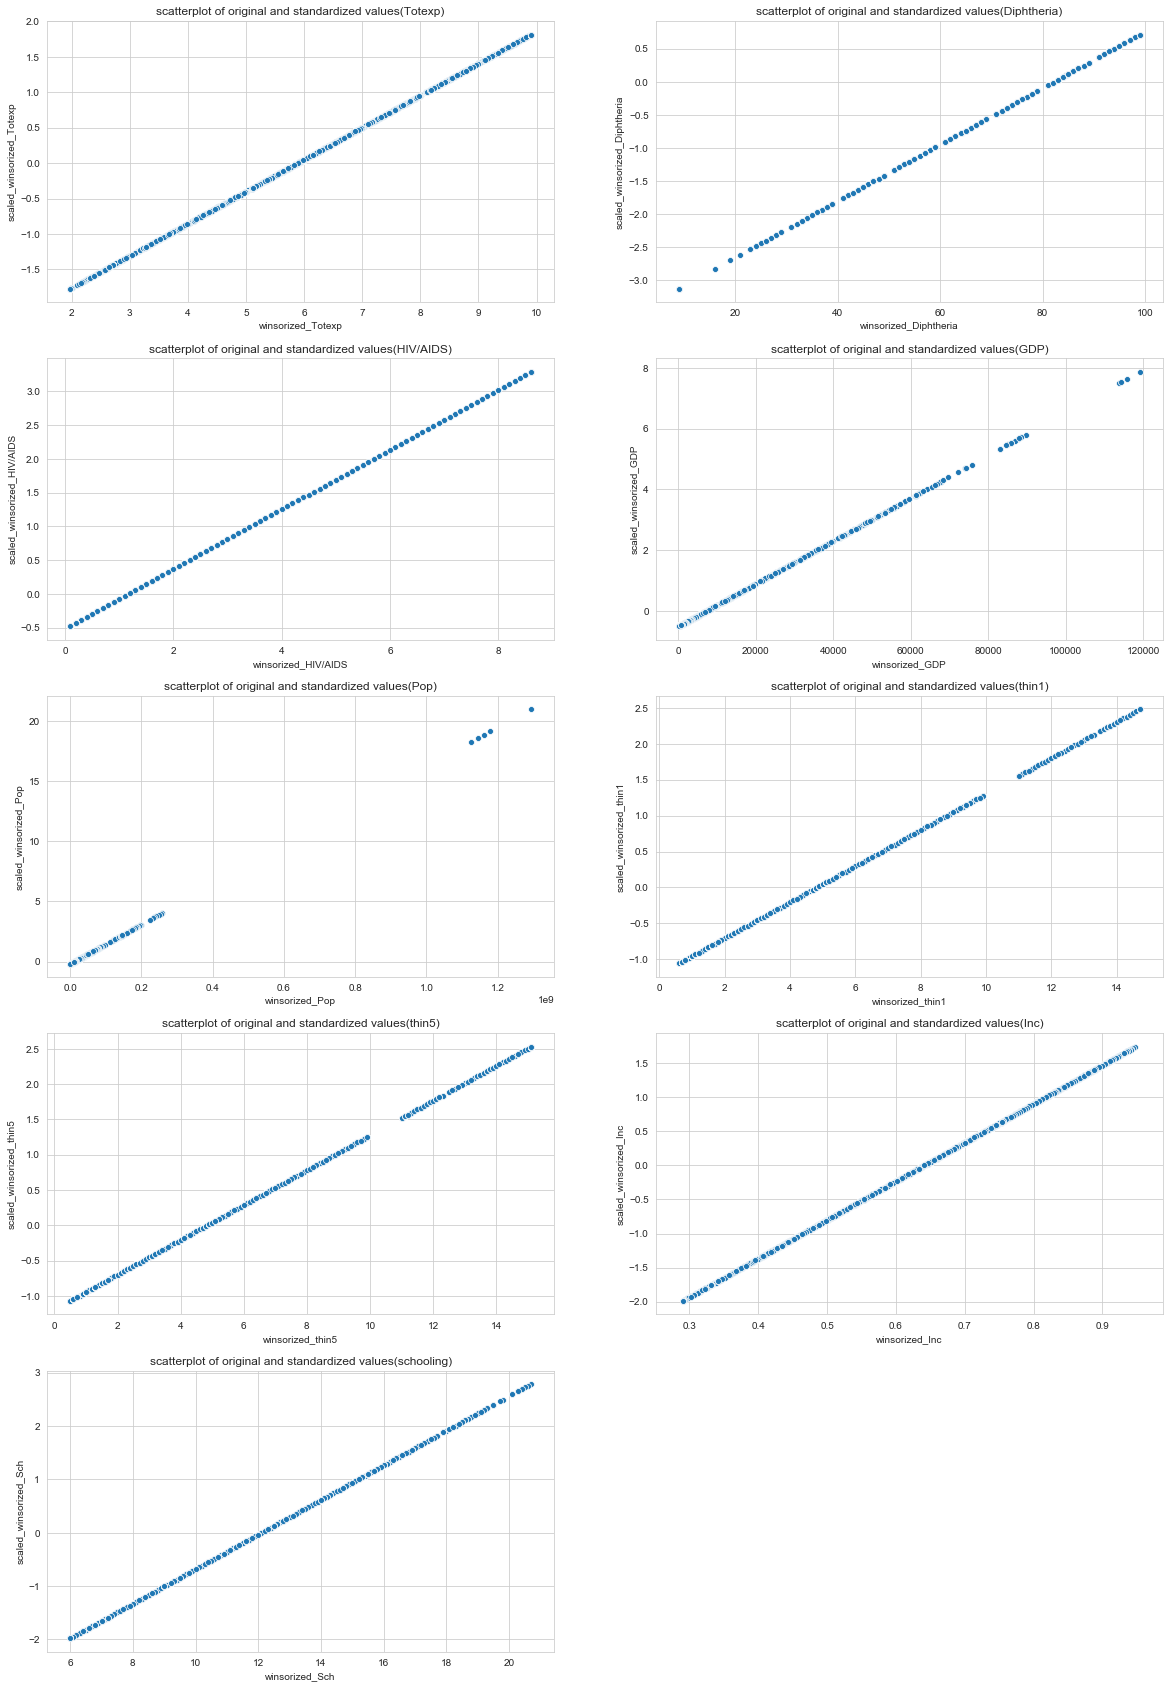

In [462]:
#plotting figure with figure size
plt.figure(figsize=(20,30))
# draw the scatter plot using seaborn for all the winsorized and scaled columns

#subplotting the graphs
plt.subplot(5,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Totexp"], life_expectancy_c["scaled_winsorized_Totexp"])
plt.title("scatterplot of original and standardized values(Totexp)")


plt.subplot(5,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Diphtheria"], life_expectancy_c["scaled_winsorized_Diphtheria"])
plt.title("scatterplot of original and standardized values(Diphtheria)")

plt.subplot(5,2,3)
sns.scatterplot(life_expectancy_c["winsorized_HIV/AIDS"], life_expectancy_c["scaled_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and standardized values(HIV/AIDS)")

plt.subplot(5,2,4)
sns.scatterplot(life_expectancy_c["winsorized_GDP"], life_expectancy_c["scaled_winsorized_GDP"])
plt.title("scatterplot of original and standardized values(GDP)")


plt.subplot(5,2,5)
sns.scatterplot(life_expectancy_c["winsorized_Pop"], life_expectancy_c["scaled_winsorized_Pop"])
plt.title("scatterplot of original and standardized values(Pop)")


plt.subplot(5,2,6)
sns.scatterplot(life_expectancy_c["winsorized_thin1"], life_expectancy_c["scaled_winsorized_thin1"])
plt.title("scatterplot of original and standardized values(thin1)")


plt.subplot(5,2,7)
sns.scatterplot(life_expectancy_c["winsorized_thin5"], life_expectancy_c["scaled_winsorized_thin5"])
plt.title("scatterplot of original and standardized values(thin5)")


plt.subplot(5,2,8)
sns.scatterplot(life_expectancy_c["winsorized_Inc"], life_expectancy_c["scaled_winsorized_Inc"])
plt.title("scatterplot of original and standardized values(Inc)")

plt.subplot(5,2,9)
sns.scatterplot(life_expectancy_c["winsorized_Sch"], life_expectancy_c["scaled_winsorized_Sch"])
plt.title("scatterplot of original and standardized values(schooling)")

plt.show()

Observation:
Standardized, population looks weird.

**Note:**
Standardization is better to find similarities between features and normalization is better to fit into some range. After, normalizing and standardizing winsorized data, I will be choosing standardized data as it is good with clustering analysis and helpful to find correlation.


### Describe: After data exploration and some feature engineering:

In [463]:
# Statistical decription after fixing missing values and outliers and feature engineering
life_expectancy_c.iloc[:, 0:22].describe() # first 22 features


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2912.000000,2512.000000,2784.000000,2928.000000,2896.000000,2928.000000,2928.000000,2896.000000,2928.000000,2928.000000,2528.000000,2.288000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.612109,921.520434,78.657263,2427.855874,38.235394,42.179303,82.393862,5.913418,82.180816,1.747712,7389.061605,1.274585e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.037383,2153.254724,25.141562,11485.970937,19.959590,160.700547,23.464941,2.454889,23.733088,5.085542,14183.915750,6.098588e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.099872,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.930000,37.824527,72.000000,0.000000,19.300000,0.000000,77.750000,4.260000,78.000000,0.100000,459.189489,1.967585e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.760000,157.016956,89.000000,17.000000,43.350000,4.000000,93.000000,5.735333,93.000000,0.100000,1725.638418,1.396804e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.702500,623.991583,96.000000,362.250000,56.100000,28.000000,97.000000,7.440000,97.000000,0.800000,5837.486028,7.414499e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Observation:
- About max of percentage expenditure, we don't see any correlation between percentage expenditure and percentage expenditure higher than 100 is 1415 rows which is alot, so I will drop this column.
- Hepatitis, BMI, Total expenditure, GDP, Population, thinness 1-19, thinness 5- 19, income composition, and schooling, all them has lower count of rows, which means they are missing some values, and there nan in there.


In [464]:
#dropping feature percentage expenditure
life_expectancy_c.drop('percentage expenditure', axis = 1, inplace = True)

In [465]:
#second part
life_expectancy_c.iloc[:, 22:41].describe() # winsorized features


,winsorized_Adult,winsorized_infant,winsorized_Alcohol,winsorized_perexp,winsorized_Hep,winsorized_Measles,winsorized_BMI,winsorized_under-five,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch,norm_winsorized_Life
count,2928.000000,2928.000000,2928.000000,2512.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2528.000000,2.288000e+03,2928.000000,2928.000000,2768.000000,2768.000000,2928.000000
mean,159.948429,16.509221,4.605215,921.681633,79.733204,1044.175205,38.494911,23.564891,82.479245,5.890707,82.269614,1.172439,7391.304838,1.274643e+07,4.813149,4.839071,0.641189,12.104552,0.584917
std,109.929743,26.277472,3.961882,2153.185988,24.686398,2538.540844,19.677126,38.609048,23.189539,2.209981,23.450719,2.259797,14182.755439,6.098576e+07,3.989006,4.058225,0.176275,3.083381,0.291072
min,13.000000,0.000000,0.010000,5.660755,9.000000,0.000000,5.200000,0.000000,9.000000,1.980000,9.000000,0.100000,81.683884,1.492800e+04,0.600000,0.500000,0.291000,6.000000,0.000000
25%,74.000000,0.000000,0.950000,37.824527,73.500000,0.000000,19.400000,0.000000,77.750000,4.280000,78.000000,0.100000,459.189489,1.967585e+05,1.600000,1.600000,0.493000,10.100000,0.382353
50%,144.000000,3.000000,3.790000,157.016956,91.000000,17.000000,43.800000,4.000000,93.000000,5.785000,93.000000,0.100000,1725.638418,1.396804e+06,3.400000,3.400000,0.677000,12.300000,0.676471
75%,228.000000,22.000000,7.820000,623.991583,97.000000,362.250000,56.400000,28.000000,97.000000,7.515000,97.000000,0.800000,5837.486028,7.414499e+06,7.300000,7.300000,0.779250,14.300000,0.794118
max,399.000000,95.000000,12.090000,19479.911610,99.000000,10000.000000,65.400000,138.000000,99.000000,9.900000,99.000000,8.600000,119172.741800,1.293859e+09,14.700000,15.100000,0.948000,20.700000,1.000000


Observation: chnages to original features:
- winsorized life got lower standard deviation, higher minimum,and lower maximum.
- winsorized adult: mean is lower, standard deviation is lower, minimum is higher, and maximum is lower.
- winsorized_infant: mean, std, and maximum become lower.
- winsorized_Alcohol: std and max is lower.
- winsorized_perexp: minimum is higher, but nothing else changed.
- winsorized_Hep: minimum is higher but other didn't change much.
- winsorized_Measles: std, mean, and max become lower.
- winsorized_BMI: higher min and lower max.
- winsorized_under-five: lower mean, std, max.
- winsorized_Polio: higher min.
- winsorized_Totexp: higher min and lower max.
- winsorized_Diphtheria: higher min
- winsorized_HIV/AIDS: lower std and max.
- winsorized_GDP: higher min
- winsorized_Pop:
- winsorized_thin1: lower std, max, and higher min
- winsorized_thin5: lower std, max and higher min
- winsorized_Inc: lower std and higher min
- winsorized_Sch: lower std and higher min

Winsorized data looks little better than original data.

In [466]:
life_expectancy_c.iloc[:, 41:60].describe() # normalized features

,norm_winsorized_Adult,norm_winsorized_infant,norm_winsorized_Alcohol,norm_winsorized_perexp,norm_winsorized_Hep,norm_winsorized_Measles,norm_winsorized_BMI,norm_winsorized_under-five,norm_winsorized_Polio,norm_winsorized_Totexp,norm_winsorized_Diphtheria,norm_winsorized_HIV/AIDS,norm_winsorized_GDP,norm_winsorized_Pop,norm_winsorized_thin1,norm_winsorized_thin5,norm_winsorized_Inc,norm_winsorized_Sch,scaled_winsorized_Life
count,2928.000000,2928.000000,2928.000000,2512.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2528.000000,2288.000000,2928.000000,2928.000000,2768.000000,2768.000000,2.928000e+03
mean,0.380695,0.173781,0.380399,0.047038,0.785924,0.104418,0.553072,0.170760,0.816436,0.493776,0.814107,0.126169,0.061378,0.009840,0.298805,0.297197,0.533012,0.415276,-5.096106e-17
std,0.284792,0.276605,0.327970,0.110566,0.274293,0.253854,0.326863,0.279776,0.257662,0.279038,0.260564,0.265859,0.119092,0.047135,0.282908,0.277961,0.268303,0.209754,1.000171e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.009867e+00
25%,0.158031,0.000000,0.077815,0.001652,0.716667,0.000000,0.235880,0.000000,0.763889,0.290404,0.766667,0.000000,0.003170,0.000141,0.070922,0.075342,0.307458,0.278912,-6.960424e-01
50%,0.339378,0.031579,0.312914,0.007772,0.911111,0.001700,0.641196,0.028986,0.933333,0.480429,0.933333,0.000000,0.013804,0.001068,0.198582,0.198630,0.587519,0.428571,3.145923e-01
75%,0.556995,0.231579,0.646523,0.031751,0.977778,0.036225,0.850498,0.202899,0.977778,0.698864,0.977778,0.082353,0.048331,0.005719,0.475177,0.465753,0.743151,0.564626,7.188461e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.426290e+00


Observation: any chnages to winsorized data
- All the max became 1 and all min is 0, thats what it suppose to do range 0 to 1.
- count looks same in all.
- All the standard deviation and mean is changed to lower number.
- It normalizes all the data to max of 1 and min of 0 with lower standard deviation, which looks better to use for feature selection, but it might be loosing lots of necessary points, and explanation.

In [467]:
life_expectancy_c.iloc[:, 60:].describe() #standardized features

,scaled_winsorized_Adult,scaled_winsorized_infant,scaled_winsorized_Alcohol,scaled_winsorized_perexp,scaled_winsorized_Hep,scaled_winsorized_Measles,scaled_winsorized_BMI,scaled_winsorized_under-five,scaled_winsorized_Polio,scaled_winsorized_Totexp,scaled_winsorized_Diphtheria,scaled_winsorized_HIV/AIDS,scaled_winsorized_GDP,scaled_winsorized_Pop,scaled_winsorized_thin1,scaled_winsorized_thin5,scaled_winsorized_Inc,scaled_winsorized_Sch
count,2.928000e+03,2.928000e+03,2.928000e+03,2.512000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2.528000e+03,2.288000e+03,2.928000e+03,2.928000e+03,2.768000e+03,2.768000e+03
mean,-1.898906e-16,-6.540761e-16,2.107452e-16,4.013067e-17,5.268275e-17,-2.354674e-17,-7.029896e-17,3.933557e-16,1.674435e-16,4.625171e-16,-1.914168e-16,9.512731e-16,3.236687e-17,3.481730e-17,9.176024e-18,-1.456789e-16,-2.355213e-16,4.816314e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000199e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000198e+00,1.000219e+00,1.000171e+00,1.000171e+00,1.000181e+00,1.000181e+00
min,-1.336977e+00,-6.283725e-01,-1.160055e+00,-4.255105e-01,-2.865760e+00,-4.113992e-01,-1.692351e+00,-6.104506e-01,-3.169179e+00,-1.769868e+00,-3.124942e+00,-4.746539e-01,-5.154899e-01,-2.088075e-01,-1.056371e+00,-1.069387e+00,-1.986965e+00,-1.980182e+00
25%,-7.819823e-01,-6.283725e-01,-9.227534e-01,-4.105698e-01,-2.525386e-01,-4.113992e-01,-9.705773e-01,-6.104506e-01,-2.039735e-01,-7.289573e-01,-1.820986e-01,-4.746539e-01,-4.888674e-01,-2.058253e-01,-8.056387e-01,-7.982859e-01,-8.408200e-01,-6.502325e-01
50%,-1.451032e-01,-5.141868e-01,-2.057998e-01,-3.552024e-01,4.564749e-01,-4.047013e-01,2.696529e-01,-5.068302e-01,4.537629e-01,-4.783968e-02,4.576499e-01,-4.746539e-01,-3.995548e-01,-1.861436e-01,-3.543214e-01,-3.546666e-01,2.031935e-01,6.339901e-02
75%,6.191518e-01,2.089895e-01,8.115674e-01,-1.382831e-01,6.995652e-01,-2.686747e-01,9.100997e-01,1.148919e-01,6.262839e-01,7.351061e-01,6.282495e-01,-1.648387e-01,-1.095786e-01,-8.744822e-02,6.235327e-01,6.065088e-01,7.833586e-01,7.121549e-01
max,2.174956e+00,2.987509e+00,1.889522e+00,8.620679e+00,7.805953e-01,3.528545e+00,1.367562e+00,2.964452e+00,7.125444e-01,1.814485e+00,7.135493e-01,3.287388e+00,7.883063e+00,2.101135e+01,2.478948e+00,2.528859e+00,1.740844e+00,2.788174e+00


Observation: any changes to winsorized data:
- all mean is negative, maybe becasue of scaling data to normal distribution.
- standard deviation is around 1.
- While distributing data, more of the data became negative to make feature in normal distribution.
- maximum is lower too.
- I think this might be better to use for PCA, and see its correlation to target, but might not be a good idea to used it for modelling, because this is missing lots of dimension to it to make nay prediction.

#### PCA(Principal Components Analysis):
PCA works better with normally distributed data, and weak to moderate correlated datas.
It combines two or more differetn features together with lower correlation to give higher correlation to target.

In [468]:
#dropping all the missing vlaues before PCA to reduce error
life_expectancy_c.dropna(inplace=True)

Checking for Correlation, to use it for PCA

#### Correlation matrix:

In [469]:
#correlation matrix of 22 original columns
life_expectancy_c.iloc[:, 0:21].corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.177657,-0.074374,-0.041393,-0.045391,0.138700,-0.097629,0.105160,-0.046959,0.092264,0.059325,0.142523,-0.155673,0.108019,0.016398,-0.050736,-0.055568,0.247605,0.225527
Life expectancy,0.177657,1.000000,-0.662604,-0.162808,0.395776,0.246137,-0.135319,0.594391,-0.189417,0.425408,0.203689,0.449975,-0.572137,0.445425,-0.011420,-0.458721,-0.450215,0.734244,0.746619
Adult Mortality,-0.074374,-0.662604,1.000000,0.042165,-0.183263,-0.100522,-0.005653,-0.370251,0.056828,-0.212945,-0.097938,-0.212157,0.532695,-0.259500,-0.021050,0.277278,0.282890,-0.418546,-0.408661
infant deaths,-0.041393,-0.162808,0.042165,1.000000,-0.103068,-0.215084,0.520328,-0.225732,0.996602,-0.152672,-0.148691,-0.156520,0.003869,-0.097887,0.555949,0.483646,0.489440,-0.139262,-0.194936
Alcohol,-0.045391,0.395776,-0.183263,-0.103068,1.000000,0.098251,-0.030689,0.375714,-0.098159,0.238104,0.237493,0.236125,-0.032663,0.459611,-0.023624,-0.401590,-0.390655,0.534276,0.591569
Hepatitis B,0.138700,0.246137,-0.100522,-0.215084,0.098251,1.000000,-0.130280,0.167290,-0.224863,0.468473,0.134913,0.581674,-0.107560,0.029970,-0.111176,-0.133135,-0.137602,0.201813,0.247798
Measles,-0.097629,-0.135319,-0.005653,0.520328,-0.030689,-0.130280,1.000000,-0.165920,0.527674,-0.110816,-0.111248,-0.115512,0.020215,-0.073369,0.266169,0.234345,0.229632,-0.135472,-0.142565
BMI,0.105160,0.594391,-0.370251,-0.225732,0.375714,0.167290,-0.165920,1.000000,-0.235991,0.260161,0.235340,0.262309,-0.236691,0.304142,-0.067975,-0.555157,-0.562781,0.542882,0.585756
under-five deaths,-0.046959,-0.189417,0.056828,0.996602,-0.098159,-0.224863,0.527674,-0.235991,1.000000,-0.170560,-0.148941,-0.177450,0.015733,-0.101544,0.543567,0.485134,0.489724,-0.159229,-0.211838
Polio,0.092264,0.425408,-0.212945,-0.152672,0.238104,0.468473,-0.110816,0.260161,-0.170560,1.000000,0.168967,0.663645,-0.137094,0.188942,-0.034258,-0.204462,-0.205446,0.378877,0.410273


Observation:
- Target highly correlated to Schooling, Income composition of resources, negatively highly correlated to Adult Mortality.
- Correlation of higher than 0.5 to target are, HIV/AIDS and BMI.
- Lower Correlation to target are thinness 1-19 years, thinness 5-9 years, GDP, Diptheria, Polio, Alcohol.
- Adult Mortality and HIV/AIDS have correlation higher than 0.5 
- Alcohol has correlation higher than 0.5 with schooling and income compostion of resources.
- BMI has correlation higher than 0.5 with target, thinness 1-19 years, thinness 5-9 years, income composition, schooling.
- Polio is highly correlated to Diptheria 
- Diptheria is highly correlated to polio and hepatitis B.
- GDP has no higher correlation with other features.
- thinness 1- 19 years is highly correlated to thinness 5- 9 years about 0.9, and to BMI more than 0.5.
- thinness 5-9 years is highly correlated to thinness 1- 19 years.
- schooling is highly correlated to income composition, and schooling and income composition both have correlation higher than 0.5 with BMI and Alchol.

Note: 
- From here I can see that schooling and income composition are highly correlated with each other so dropping one would be better.
- Schooling has higher correlation so its better to drop income composition
- Higher correlation to target, features: Schooling, Adult Mortality.
- New feature, would be one with the combination of BMI and HIV/AIDS, and thinness 1-19 years, GDP, Diptheria, and Alcohol.



In [470]:
#correlation matrix of winsorized columns
life_expectancy_c.iloc[:, 21:40].corr()

,winsorized_Life,winsorized_Adult,winsorized_infant,winsorized_Alcohol,winsorized_perexp,winsorized_Hep,winsorized_Measles,winsorized_BMI,winsorized_under-five,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
winsorized_Life,1.000000,-0.653835,-0.466447,0.408386,0.419677,0.252945,-0.221549,0.615337,-0.501330,0.433092,0.246260,0.455417,-0.718845,0.447483,-0.014284,-0.532080,-0.523567,0.841176,0.780051
winsorized_Adult,-0.653835,1.000000,0.268138,-0.204193,-0.265256,-0.101995,0.079429,-0.392498,0.285553,-0.230421,-0.148656,-0.231045,0.515803,-0.277054,-0.017288,0.337472,0.343793,-0.503298,-0.451080
winsorized_infant,-0.466447,0.268138,1.000000,-0.262906,-0.210355,-0.206003,0.574034,-0.449732,0.992681,-0.303749,-0.218785,-0.289149,0.261408,-0.227735,0.300508,0.393182,0.404430,-0.433982,-0.476766
winsorized_Alcohol,0.408386,-0.204193,-0.262906,1.000000,0.440442,0.096936,-0.118442,0.387616,-0.266731,0.240232,0.262802,0.237740,-0.062052,0.462314,-0.022596,-0.425979,-0.415280,0.595026,0.609257
winsorized_perexp,0.419677,-0.265256,-0.210355,0.440442,1.000000,0.013012,-0.104316,0.287318,-0.209417,0.165616,0.231972,0.171357,-0.162656,0.948785,-0.015522,-0.296781,-0.298182,0.464613,0.447598
winsorized_Hep,0.252945,-0.101995,-0.206003,0.096936,0.013012,1.000000,-0.192072,0.172537,-0.216782,0.472581,0.141332,0.585887,-0.189917,0.029984,-0.109050,-0.113529,-0.118541,0.229843,0.253713
winsorized_Measles,-0.221549,0.079429,0.574034,-0.118442,-0.104316,-0.192072,1.000000,-0.258360,0.578747,-0.193238,-0.175015,-0.180392,0.101861,-0.110549,0.274120,0.233506,0.234976,-0.200143,-0.247464
winsorized_BMI,0.615337,-0.392498,-0.449732,0.387616,0.287318,0.172537,-0.258360,1.000000,-0.469251,0.267621,0.259885,0.269349,-0.384026,0.309951,-0.067952,-0.589921,-0.598493,0.622550,0.610008
winsorized_under-five,-0.501330,0.285553,0.992681,-0.266731,-0.209417,-0.216782,0.578747,-0.469251,1.000000,-0.323165,-0.214358,-0.311086,0.288826,-0.228833,0.286211,0.404388,0.409540,-0.465109,-0.505075
winsorized_Polio,0.433092,-0.230421,-0.303749,0.240232,0.165616,0.472581,-0.193238,0.267621,-0.323165,1.000000,0.177537,0.667191,-0.276359,0.189870,-0.034711,-0.222011,-0.221277,0.422189,0.420567


Observation:
- We can see that correlation has got better than orriginal features.
- We will use Winsorized_Inc, it has higher correlation than winsorized_Sch.
- Will use, winsorized HIV/AIDS instead of winsorized adult mortality
- Will use, combination of winsorized thin1, GDP, Diptheria, and alcohol

In [471]:
#correlation matrix of normalized columns
life_expectancy_c.iloc[:, 40:59].corr()

,norm_winsorized_Life,norm_winsorized_Adult,norm_winsorized_infant,norm_winsorized_Alcohol,norm_winsorized_perexp,norm_winsorized_Hep,norm_winsorized_Measles,norm_winsorized_BMI,norm_winsorized_under-five,norm_winsorized_Polio,norm_winsorized_Totexp,norm_winsorized_Diphtheria,norm_winsorized_HIV/AIDS,norm_winsorized_GDP,norm_winsorized_Pop,norm_winsorized_thin1,norm_winsorized_thin5,norm_winsorized_Inc,norm_winsorized_Sch
norm_winsorized_Life,1.000000,-0.653835,-0.466447,0.408386,0.419677,0.252945,-0.221549,0.615337,-0.501330,0.433092,0.246260,0.455417,-0.718845,0.447483,-0.014284,-0.532080,-0.523567,0.841176,0.780051
norm_winsorized_Adult,-0.653835,1.000000,0.268138,-0.204193,-0.265256,-0.101995,0.079429,-0.392498,0.285553,-0.230421,-0.148656,-0.231045,0.515803,-0.277054,-0.017288,0.337472,0.343793,-0.503298,-0.451080
norm_winsorized_infant,-0.466447,0.268138,1.000000,-0.262906,-0.210355,-0.206003,0.574034,-0.449732,0.992681,-0.303749,-0.218785,-0.289149,0.261408,-0.227735,0.300508,0.393182,0.404430,-0.433982,-0.476766
norm_winsorized_Alcohol,0.408386,-0.204193,-0.262906,1.000000,0.440442,0.096936,-0.118442,0.387616,-0.266731,0.240232,0.262802,0.237740,-0.062052,0.462314,-0.022596,-0.425979,-0.415280,0.595026,0.609257
norm_winsorized_perexp,0.419677,-0.265256,-0.210355,0.440442,1.000000,0.013012,-0.104316,0.287318,-0.209417,0.165616,0.231972,0.171357,-0.162656,0.948785,-0.015522,-0.296781,-0.298182,0.464613,0.447598
norm_winsorized_Hep,0.252945,-0.101995,-0.206003,0.096936,0.013012,1.000000,-0.192072,0.172537,-0.216782,0.472581,0.141332,0.585887,-0.189917,0.029984,-0.109050,-0.113529,-0.118541,0.229843,0.253713
norm_winsorized_Measles,-0.221549,0.079429,0.574034,-0.118442,-0.104316,-0.192072,1.000000,-0.258360,0.578747,-0.193238,-0.175015,-0.180392,0.101861,-0.110549,0.274120,0.233506,0.234976,-0.200143,-0.247464
norm_winsorized_BMI,0.615337,-0.392498,-0.449732,0.387616,0.287318,0.172537,-0.258360,1.000000,-0.469251,0.267621,0.259885,0.269349,-0.384026,0.309951,-0.067952,-0.589921,-0.598493,0.622550,0.610008
norm_winsorized_under-five,-0.501330,0.285553,0.992681,-0.266731,-0.209417,-0.216782,0.578747,-0.469251,1.000000,-0.323165,-0.214358,-0.311086,0.288826,-0.228833,0.286211,0.404388,0.409540,-0.465109,-0.505075
norm_winsorized_Polio,0.433092,-0.230421,-0.303749,0.240232,0.165616,0.472581,-0.193238,0.267621,-0.323165,1.000000,0.177537,0.667191,-0.276359,0.189870,-0.034711,-0.222011,-0.221277,0.422189,0.420567


Observation:
- not much is different than winsorized data.
- I might not use these features for modelling.


In [472]:
#correlation matrix of winsorized columns
life_expectancy_c.iloc[:, 59:].corr()

,scaled_winsorized_Life,scaled_winsorized_Adult,scaled_winsorized_infant,scaled_winsorized_Alcohol,scaled_winsorized_perexp,scaled_winsorized_Hep,scaled_winsorized_Measles,scaled_winsorized_BMI,scaled_winsorized_under-five,scaled_winsorized_Polio,scaled_winsorized_Totexp,scaled_winsorized_Diphtheria,scaled_winsorized_HIV/AIDS,scaled_winsorized_GDP,scaled_winsorized_Pop,scaled_winsorized_thin1,scaled_winsorized_thin5,scaled_winsorized_Inc,scaled_winsorized_Sch
scaled_winsorized_Life,1.000000,-0.653835,-0.466447,0.408386,0.419677,0.252945,-0.221549,0.615337,-0.501330,0.433092,0.246260,0.455417,-0.718845,0.447483,-0.014284,-0.532080,-0.523567,0.841176,0.780051
scaled_winsorized_Adult,-0.653835,1.000000,0.268138,-0.204193,-0.265256,-0.101995,0.079429,-0.392498,0.285553,-0.230421,-0.148656,-0.231045,0.515803,-0.277054,-0.017288,0.337472,0.343793,-0.503298,-0.451080
scaled_winsorized_infant,-0.466447,0.268138,1.000000,-0.262906,-0.210355,-0.206003,0.574034,-0.449732,0.992681,-0.303749,-0.218785,-0.289149,0.261408,-0.227735,0.300508,0.393182,0.404430,-0.433982,-0.476766
scaled_winsorized_Alcohol,0.408386,-0.204193,-0.262906,1.000000,0.440442,0.096936,-0.118442,0.387616,-0.266731,0.240232,0.262802,0.237740,-0.062052,0.462314,-0.022596,-0.425979,-0.415280,0.595026,0.609257
scaled_winsorized_perexp,0.419677,-0.265256,-0.210355,0.440442,1.000000,0.013012,-0.104316,0.287318,-0.209417,0.165616,0.231972,0.171357,-0.162656,0.948785,-0.015522,-0.296781,-0.298182,0.464613,0.447598
scaled_winsorized_Hep,0.252945,-0.101995,-0.206003,0.096936,0.013012,1.000000,-0.192072,0.172537,-0.216782,0.472581,0.141332,0.585887,-0.189917,0.029984,-0.109050,-0.113529,-0.118541,0.229843,0.253713
scaled_winsorized_Measles,-0.221549,0.079429,0.574034,-0.118442,-0.104316,-0.192072,1.000000,-0.258360,0.578747,-0.193238,-0.175015,-0.180392,0.101861,-0.110549,0.274120,0.233506,0.234976,-0.200143,-0.247464
scaled_winsorized_BMI,0.615337,-0.392498,-0.449732,0.387616,0.287318,0.172537,-0.258360,1.000000,-0.469251,0.267621,0.259885,0.269349,-0.384026,0.309951,-0.067952,-0.589921,-0.598493,0.622550,0.610008
scaled_winsorized_under-five,-0.501330,0.285553,0.992681,-0.266731,-0.209417,-0.216782,0.578747,-0.469251,1.000000,-0.323165,-0.214358,-0.311086,0.288826,-0.228833,0.286211,0.404388,0.409540,-0.465109,-0.505075
scaled_winsorized_Polio,0.433092,-0.230421,-0.303749,0.240232,0.165616,0.472581,-0.193238,0.267621,-0.323165,1.000000,0.177537,0.667191,-0.276359,0.189870,-0.034711,-0.222011,-0.221277,0.422189,0.420567


Observation:
- standardized features doesn't have better correlation than winsorized features.
- So I will be using original features or winsorized features for further analysis.

#### PCA:

#### Using lower number feature to get higher correlation:

In [473]:
#between higher corelated features
X = life_expectancy_c[["winsorized_HIV/AIDS", "BMI", "Adult Mortality", "winsorized_Inc"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.61349318]


Observation: total variance is about 0.55 when 4 of the higher correalted features were combined.

In [474]:
#between lower corelated features 
X1 = life_expectancy_c[["Alcohol", "Diphtheria", "GDP", "BMI"]]

X1 = StandardScaler().fit_transform(X1)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_2"] = sklearn_pca.fit_transform(X1)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.48302648]


Observation: total variance is about 0.48 when 4 of the lower correalted features were combined.

In [475]:
#between winsorized features with lower corelation
X2 = life_expectancy_c[["winsorized_thin1", "winsorized_GDP", "winsorized_Diphtheria", "winsorized_Alcohol"]]

X2 = StandardScaler().fit_transform(X2)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_3"] = sklearn_pca.fit_transform(X2)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.49037066]


Observation: total variance is about 0.49 when 4 of the lower correalted winsorized features were combined.

#### Correlation Matrix: To see correlation of pca_1, pca_2, and pca_3 to target(life expectancy)
 

In [477]:
#only use certain features, as I am only looking at pca and target correlation
life_expectancy_c[["pca_1","pca_2","pca_3", "Life expectancy","Schooling", "Income composition of resources",
                  "Adult Mortality", "Alcohol", "BMI", "Diphtheria", "HIV/AIDS", "GDP", "thinness  1-19 years", "thinness 5-9 years",
                  "winsorized_thin1", "winsorized_GDP", "winsorized_Diphtheria", "winsorized_Alcohol"]].corr()

,pca_1,pca_2,pca_3,Life expectancy,Schooling,Income composition of resources,Adult Mortality,Alcohol,BMI,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,winsorized_thin1,winsorized_GDP,winsorized_Diphtheria,winsorized_Alcohol
pca_1,1.000000,-0.695898,-0.622211,-0.899813,-0.724437,-0.747366,0.777170,-0.394008,-0.751580,-0.391777,0.601531,-0.403668,0.501202,0.496311,0.562691,-0.403526,-0.393050,-0.394276
pca_2,-0.695898,1.000000,0.943495,0.671364,0.752414,0.703030,-0.366655,0.780694,0.705217,0.545112,-0.186723,0.726736,-0.536173,-0.532707,-0.572366,0.726654,0.546115,0.780690
pca_3,-0.622211,0.943495,1.000000,0.638216,0.716914,0.673744,-0.348509,0.795122,0.553045,0.522972,-0.184020,0.725285,-0.688262,-0.655251,-0.723107,0.725237,0.524143,0.798689
Life expectancy,-0.899813,0.671364,0.638216,1.000000,0.746619,0.734244,-0.662604,0.395776,0.594391,0.449975,-0.572137,0.445425,-0.458721,-0.450215,-0.517146,0.445295,0.451347,0.398633
Schooling,-0.724437,0.752414,0.716914,0.746619,1.000000,0.811482,-0.408661,0.591569,0.585756,0.432891,-0.211615,0.471767,-0.467009,-0.451321,-0.501864,0.471640,0.434320,0.592992
Income composition of resources,-0.747366,0.703030,0.673744,0.734244,0.811482,1.000000,-0.418546,0.534276,0.542882,0.418070,-0.246668,0.454742,-0.435197,-0.417641,-0.474761,0.454618,0.419353,0.536789
Adult Mortality,0.777170,-0.366655,-0.348509,-0.662604,-0.408661,-0.418546,1.000000,-0.183263,-0.370251,-0.212157,0.532695,-0.259500,0.277278,0.282890,0.326070,-0.259417,-0.212969,-0.185362
Alcohol,-0.394008,0.780694,0.795122,0.395776,0.591569,0.534276,-0.183263,1.000000,0.375714,0.236125,-0.032663,0.459611,-0.401590,-0.390655,-0.423563,0.459544,0.237352,0.996198
BMI,-0.751580,0.705217,0.553045,0.594391,0.585756,0.542882,-0.370251,0.375714,1.000000,0.262309,-0.236691,0.304142,-0.555157,-0.562781,-0.588520,0.304009,0.262961,0.376763
Diphtheria,-0.391777,0.545112,0.522972,0.449975,0.432891,0.418070,-0.212157,0.236125,0.262309,1.000000,-0.147952,0.190957,-0.222014,-0.215681,-0.241170,0.190936,0.999809,0.236504


Observations:
- pca_1 is negatively highly correlated to Life expectancy about 0.89 which is higher than if those features were used alone.
- pca_2 has higher correlation of 0.67 which is higher than if those features were not combined together.
- same with pca_3, which has correlation of 0.63 which is higher because of combined features.
- we can use those combination of features to get higher correlation, but we don't know if they have lower error or not.


Before feature selection, I could use **Status** as a feature because it shows high correlation to life expectancy.


Feature engineering using Dummies one hot coding:

In [478]:

life_expectancy_c["Status"] = pd.get_dummies(life_expectancy_c.Status, drop_first=True)

### Feature Selection:
                        

#### Forward Selection:
**In forward passes**, the algorithm begins with no features and adds features 1-by-1, always adding the feature that results in the highest increase in predictive power and stopping at some predetermined threshold.


In [479]:
#initializing data and target
data = life_expectancy_c.iloc[:, 4:] # data is all from column 4 to 82 includes all the rows
target = life_expectancy_c.iloc[:, 3]  #target is column 3 which is life expectancy

In [480]:
#importing all the sklearn libraries that is needed for further selection process
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import accuracy_score as acc

boston = load_boston()
X, y = boston.data, boston.target
lr = LinearRegression()

#### R2 scoring:
Selecting 13 features through forward selection:

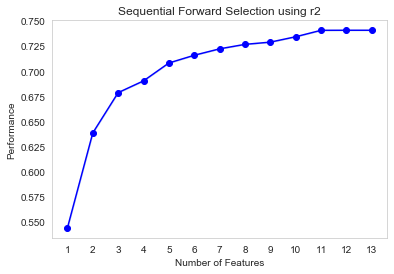


Forward Selection:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

Score:
0.7406426641094095


In [481]:
#forward selection method using r2 scoring
sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=0)

sfs = sfs.fit(X,y)

fig = plot_sfs(sfs.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Forward Selection using r2')
plt.grid()
plt.show()
print('\nForward Selection:')
print(sfs.k_feature_idx_)
print('\nScore:')
print(sfs.k_score_)



Observation: 
- I selected 13 features and from the result, all these 13 features when added together, gives higher correlation to the target. We can see after feature 3 to 11 shows higher score.
- Score of about 0.71
- Features selected = Adult Mortality, infant death, alcohol, Hepatitis B, Measles, BMI, under-five deaths, polio, total expenditure, diptheria, HIV/AIDS, GDP, population. 



#### R2 scoring with 5 features:

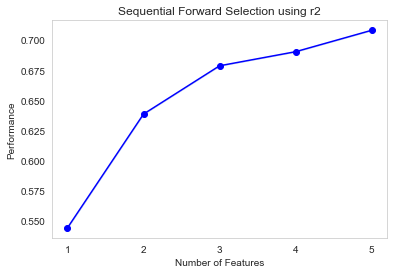


Forward Selection:
(4, 5, 7, 10, 12)

Score:
0.7080892893529662


In [482]:
sfs1 = SFS(lr, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=0)

sfs1 = sfs1.fit(X,y)

fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection using r2')
plt.grid()
plt.show()
print('\nForward Selection:')
print(sfs1.k_feature_idx_)
print('\nScore:')
print(sfs1.k_score_)

Observation: 

Here 5 features are: 4(Hepatitis B), 5(Measles), 7(under-five deaths), 10(Diphtheria), and 12(GDP).

Now, Lets move to another wrapper selection method which is: **Backward Selection**:

**In backward passes**, the algorithm begins with all features and drops features 1-by-1, always dropping the feature with the least predictive power and stopping at some predetermined threshold.

In [483]:
#backward selection method using r2 scoring
sbs = SFS(lr, 
          k_features=13, 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=0)

sbs = sbs.fit(X,y)

print('\nBackward Selection:')
print(sbs.k_feature_idx_)
print('\nScore:')
print(sbs.k_score_)


Backward Selection:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

Score:
0


Observation:
- Backward Selection, gives same result as forward selection when 13 features were selected: 0(Adult Mortality), 1(infant deaths), 2(Alcohol), 3(Hepatitis B), 4(Measles), 5(BMI), 6(under-five deaths), 7(Polio), 8(Total expenditure), 9(Diphtheria), 10(HIV/AIDS), 11(GDP), and 12(population).
- But the score is 0.


Bakcward selection using R2 scoring and to select 5 features:

In [484]:
#backward selection method using r2 scoring
sbs1 = SFS(lr, 
          k_features=5, 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=0)

sbs1 = sbs1.fit(X,y)

print('\nBackward Selection:')
print(sbs1.k_feature_idx_)
print('\nScore:')
print(sbs1.k_score_)


Backward Selection:
(4, 5, 7, 10, 12)

Score:
0.7080892893529662


Observation: 
- Backward Selection using r2 and 5 features, gives: 4(Measles), 5(BMI), 7(Polio), 10(HIV/AIDS), and 12(population). features which might have higher correlation when added together.
- Score of about 0.71

#### Observations in Forward and Backward selection:

Oservations:
- When 13 features were selected, results were same when using forward/backward selection but score was 0 in backward selection.
- When 5 features were selected, the results were same too using forward/backward selection, and also the score was same about 0.76.
- I am going to use 5 features rather than 13, becasue both selection method shows same result.

#### RFE(Recursive Feature Elimination): Another selection method:

In [485]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
rfe = RFE(lr, 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False  True  True  True False  True False False  True False
 False]
Feature Ranking: [4 6 5 1 1 1 9 1 3 7 1 8 2]


Obs:
From result:

No. 1 ranking 5 features are: feature id 3, 4, 5, 7, and 10.

Lets find out how many features are the optimum number to get higher score:

In [486]:
#no of features
nof_list=np.arange(1,82)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    lr = LinearRegression()
    rfe = RFE(lr,nof_list[n])
    X_rfe = rfe.fit_transform(X,y)
    lr.fit(X_rfe,y)
    score = lr.score(X_rfe,y)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 13
Score with 13 features: 0.740643


Observation:
- As we can see that if 13 features are added, then it will give higher score of 0.74 which is highly correlated to our target life expectancy.
- We got same result as forward selection for 13 features.


#### Table of new features:

In [429]:
#creating new dataframe for new features
life_expectancy_c1 = life_expectancy_c[["pca_1", "pca_2", "pca_3", "winsorized_Inc", "Adult Mortality",
                                       "BMI", "winsorized_HIV/AIDS", "thinness  1-19 years", "GDP", 
                                       "Diphtheria", "Alcohol", "Status"]]
life_expectancy_c1.head()

pca_1     pca_2     pca_3  winsorized_Inc  Adult Mortality   BMI  \
0 0  0.937863 -1.554010 -2.373227           0.479            263.0  19.1   
  1  0.989755 -1.614168 -2.418933           0.476            271.0  18.6   
  2  1.008787 -1.593626 -2.386731           0.470            268.0  18.1   
  3  1.057658 -1.555977 -2.337989           0.463            272.0  17.6   
  4  1.106423 -1.577861 -2.349113           0.454            275.0  17.2   

     winsorized_HIV/AIDS  thinness  1-19 years         GDP  Diphtheria  \
0 0                  0.1                  17.2  584.259210        65.0   
  1                  0.1                  17.5  612.696514        62.0   
  2                  0.1                  17.7  631.744976        64.0   
  3                  0.1                  17.9  669.959000        67.0   
  4                  0.1                  18.2   63.537231        68.0   

     Alcohol  Status  
0 0     0.01       1  
  1     0.01       1  
  2     0.01       1  
  3     0.01       1  
  4     0.01       1

### Conclusion:
- During data exploration, we saw that target is affected by Status of Country, developed countries life expectancy was higher than developing countries and was increasing every year.
- Next, Through Correlation Matrix, we found that, Schooling and Income composition was highly correlated to each other so I decided to use Schooling but not Income composition because schooling has higher correlation than income composition, but also winsorized income composition had higher correlation so I decided to use this instead of schooling.
- Likewise, from correlation matrix, I conclude to use combination of winsorized_inc, Adult Mortality, BMI and winsorized_HIV/AIDS, and thinness 1-19 years, GDP, Diptheria, and Alcohol as another combination of features.
- After pca, pca_1, pca_2, and pca_3, shows the higher correlation to the target(life expecatncy) which are the combination I talked above.

- From Feature selection I got some combination of features, which is anotehr set of features that I will use next for modelling.
- I got 4 different features combination that I could use for training, cross validaton, and testing to find better model, which later can be used for prediction.
- life_expectancy_c1 is new table with features which I will use for further analysis, and modelling.
